# Assignment:
1. Parameterize the class Net to take a custom breadth.
2. Plot loss vs. breadth for several instance of Net on the dataset above.

# Stretch Goals:
- Add a depth parameter to Net and plot performance vs. depth.
- Plot performance vs number of points for some fixed size net.

In [27]:
from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as utils
import matplotlib.pyplot as plt
from tqdm import trange # Used to provide progress bar
%matplotlib inline

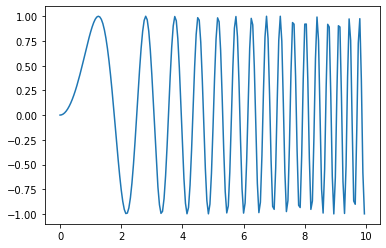

In [17]:
inputs = Variable(torch.arange(0,10,.05))
#true_vals = torch.mul(inputs, inputs)
true_vals = torch.sin(inputs * inputs)
plt.plot(list(inputs.data), list(true_vals.data))
plt.show()

In [52]:
class Net(nn.Module):
    def __init__(self, breadth=500, depth=3):
        super().__init__()
        
        self.input_layer = nn.Linear(1, breadth)
        for i in range(depth-2):
            self.add_module('hidden_layer%i' % i, nn.Linear(breadth, breadth))
        self.output_layer = nn.Linear(breadth, 1)
        
    def forward(self, x):
        layers = list(self.children())
        for layer in layers[:-1]:
            x = F.relu(layer(x))
        x = layers[-1](x)
        return x

losses = []

for breadth in range(100, 1000, 100):
    net = Net(breadth=breadth)

    net.zero_grad()
    outputs = net(Variable(torch.Tensor([0])))
    outputs.backward(torch.randn(1)) # Use random gradients to break symmetry?

    learning_rate = 1 # Need to initialize carefully
    for f in net.parameters():
        f.data.sub_(f.grad.data * learning_rate)

    losses.append([])

    # create your optimizer
    optimizer = optim.Adam(net.parameters())
    criterion = nn.MSELoss()

    num_epochs = 1000
    t = trange(num_epochs)
    for epoch in t:  # loop over the dataset multiple times

        running_loss = 0.0

        # wrap them in Variable
        reshaped_inputs = inputs.view(-1, 1) # Structure with each input in its own row
        reshaped_outputs = true_vals.view(-1, 1) # Neglecting to have outputs and true vals to match dimension is a common mistake.

        # forward + backward + optimize
        outputs = net(reshaped_inputs)
        #print(outputs)
        #print(reshaped_outputs)
        loss = criterion(outputs, reshaped_outputs)
        losses[-1].append(loss)

        loss.backward()
        optimizer.step()

        # zero the parameter gradients
        optimizer.zero_grad()

        t.set_description('ML (loss=%g)' % loss.item()) # Updates Loss information

print('Finished Training')



  0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=474.699):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=412.566):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=357.654):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=309.553):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=266.712):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=228.246):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=193.727):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=162.797):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=135.258):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=110.953):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=89.9704):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=72.5185):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=57.9307):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=45.8217):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=35.9886):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=28.4514):   0%|          | 0/100

ML (loss=1.66526):  10%|▉         | 95/1000 [00:00<00:03, 231.08it/s]

ML (loss=1.6453):  10%|▉         | 95/1000 [00:00<00:03, 231.08it/s] 

ML (loss=1.6255):  10%|▉         | 95/1000 [00:00<00:03, 231.08it/s]

ML (loss=1.60585):  10%|▉         | 95/1000 [00:00<00:03, 231.08it/s]

ML (loss=1.58623):  10%|▉         | 95/1000 [00:00<00:03, 231.08it/s]

ML (loss=1.56667):  10%|▉         | 95/1000 [00:00<00:03, 231.08it/s]

ML (loss=1.54724):  10%|▉         | 95/1000 [00:00<00:03, 231.08it/s]

ML (loss=1.5279):  10%|▉         | 95/1000 [00:00<00:03, 231.08it/s] 

ML (loss=1.50865):  10%|▉         | 95/1000 [00:00<00:03, 231.08it/s]

ML (loss=1.48963):  10%|▉         | 95/1000 [00:00<00:03, 231.08it/s]

ML (loss=1.47083):  10%|▉         | 95/1000 [00:00<00:03, 231.08it/s]

ML (loss=1.45221):  10%|▉         | 95/1000 [00:00<00:03, 231.08it/s]

ML (loss=1.43373):  10%|▉         | 95/1000 [00:00<00:03, 231.08it/s]

ML (loss=1.41528):  10%|▉         | 95/1000 [00:00<00:03, 231.08it/s]

ML (los

ML (loss=0.544142):  19%|█▊        | 186/1000 [00:00<00:03, 225.25it/s]

ML (loss=0.540725):  19%|█▊        | 186/1000 [00:00<00:03, 225.25it/s]

ML (loss=0.537908):  19%|█▊        | 186/1000 [00:00<00:03, 225.25it/s]

ML (loss=0.535264):  19%|█▊        | 186/1000 [00:00<00:03, 225.25it/s]

ML (loss=0.532563):  19%|█▊        | 186/1000 [00:00<00:03, 225.25it/s]

ML (loss=0.532563):  21%|██        | 209/1000 [00:00<00:03, 223.68it/s]

ML (loss=0.529712):  21%|██        | 209/1000 [00:00<00:03, 223.68it/s]

ML (loss=0.526932):  21%|██        | 209/1000 [00:00<00:03, 223.68it/s]

ML (loss=0.524199):  21%|██        | 209/1000 [00:00<00:03, 223.68it/s]

ML (loss=0.52148):  21%|██        | 209/1000 [00:00<00:03, 223.68it/s] 

ML (loss=0.518996):  21%|██        | 209/1000 [00:00<00:03, 223.68it/s]

ML (loss=0.516681):  21%|██        | 209/1000 [00:00<00:03, 223.68it/s]

ML (loss=0.514494):  21%|██        | 209/1000 [00:00<00:03, 223.68it/s]

ML (loss=0.512575):  21%|██        | 209/1000 [00:0

ML (loss=0.467789):  30%|██▉       | 299/1000 [00:01<00:03, 222.00it/s]

ML (loss=0.467644):  30%|██▉       | 299/1000 [00:01<00:03, 222.00it/s]

ML (loss=0.467504):  30%|██▉       | 299/1000 [00:01<00:03, 222.00it/s]

ML (loss=0.467363):  30%|██▉       | 299/1000 [00:01<00:03, 222.00it/s]

ML (loss=0.467223):  30%|██▉       | 299/1000 [00:01<00:03, 222.00it/s]

ML (loss=0.467084):  30%|██▉       | 299/1000 [00:01<00:03, 222.00it/s]

ML (loss=0.466946):  30%|██▉       | 299/1000 [00:01<00:03, 222.00it/s]

ML (loss=0.466808):  30%|██▉       | 299/1000 [00:01<00:03, 222.00it/s]

ML (loss=0.466671):  30%|██▉       | 299/1000 [00:01<00:03, 222.00it/s]

ML (loss=0.466533):  30%|██▉       | 299/1000 [00:01<00:03, 222.00it/s]

ML (loss=0.466396):  30%|██▉       | 299/1000 [00:01<00:03, 222.00it/s]

ML (loss=0.466261):  30%|██▉       | 299/1000 [00:01<00:03, 222.00it/s]

ML (loss=0.466127):  30%|██▉       | 299/1000 [00:01<00:03, 222.00it/s]

ML (loss=0.465994):  30%|██▉       | 299/1000 [00:0

ML (loss=0.456518):  39%|███▉      | 391/1000 [00:01<00:02, 217.57it/s]

ML (loss=0.456428):  39%|███▉      | 391/1000 [00:01<00:02, 217.57it/s]

ML (loss=0.456337):  39%|███▉      | 391/1000 [00:01<00:02, 217.57it/s]

ML (loss=0.456247):  39%|███▉      | 391/1000 [00:01<00:02, 217.57it/s]

ML (loss=0.456158):  39%|███▉      | 391/1000 [00:01<00:02, 217.57it/s]

ML (loss=0.456068):  39%|███▉      | 391/1000 [00:01<00:02, 217.57it/s]

ML (loss=0.455979):  39%|███▉      | 391/1000 [00:01<00:02, 217.57it/s]

ML (loss=0.455891):  39%|███▉      | 391/1000 [00:01<00:02, 217.57it/s]

ML (loss=0.455804):  39%|███▉      | 391/1000 [00:01<00:02, 217.57it/s]

ML (loss=0.455716):  39%|███▉      | 391/1000 [00:01<00:02, 217.57it/s]

ML (loss=0.455628):  39%|███▉      | 391/1000 [00:01<00:02, 217.57it/s]

ML (loss=0.455541):  39%|███▉      | 391/1000 [00:01<00:02, 217.57it/s]

ML (loss=0.455541):  41%|████▏     | 413/1000 [00:01<00:02, 215.02it/s]

ML (loss=0.455453):  41%|████▏     | 413/1000 [00:0

ML (loss=0.449298):  48%|████▊     | 479/1000 [00:02<00:02, 216.46it/s]

ML (loss=0.449244):  48%|████▊     | 479/1000 [00:02<00:02, 216.46it/s]

ML (loss=0.449244):  50%|█████     | 502/1000 [00:02<00:02, 217.97it/s]

ML (loss=0.449189):  50%|█████     | 502/1000 [00:02<00:02, 217.97it/s]

ML (loss=0.449135):  50%|█████     | 502/1000 [00:02<00:02, 217.97it/s]

ML (loss=0.44908):  50%|█████     | 502/1000 [00:02<00:02, 217.97it/s] 

ML (loss=0.449026):  50%|█████     | 502/1000 [00:02<00:02, 217.97it/s]

ML (loss=0.448972):  50%|█████     | 502/1000 [00:02<00:02, 217.97it/s]

ML (loss=0.448918):  50%|█████     | 502/1000 [00:02<00:02, 217.97it/s]

ML (loss=0.448864):  50%|█████     | 502/1000 [00:02<00:02, 217.97it/s]

ML (loss=0.448811):  50%|█████     | 502/1000 [00:02<00:02, 217.97it/s]

ML (loss=0.448758):  50%|█████     | 502/1000 [00:02<00:02, 217.97it/s]

ML (loss=0.448705):  50%|█████     | 502/1000 [00:02<00:02, 217.97it/s]

ML (loss=0.448652):  50%|█████     | 502/1000 [00:0

ML (loss=0.444405):  59%|█████▉    | 592/1000 [00:02<00:01, 217.94it/s]

ML (loss=0.444358):  59%|█████▉    | 592/1000 [00:02<00:01, 217.94it/s]

ML (loss=0.444311):  59%|█████▉    | 592/1000 [00:02<00:01, 217.94it/s]

ML (loss=0.444264):  59%|█████▉    | 592/1000 [00:02<00:01, 217.94it/s]

ML (loss=0.444217):  59%|█████▉    | 592/1000 [00:02<00:01, 217.94it/s]

ML (loss=0.444171):  59%|█████▉    | 592/1000 [00:02<00:01, 217.94it/s]

ML (loss=0.444125):  59%|█████▉    | 592/1000 [00:02<00:01, 217.94it/s]

ML (loss=0.44408):  59%|█████▉    | 592/1000 [00:02<00:01, 217.94it/s] 

ML (loss=0.444034):  59%|█████▉    | 592/1000 [00:02<00:01, 217.94it/s]

ML (loss=0.443988):  59%|█████▉    | 592/1000 [00:02<00:01, 217.94it/s]

ML (loss=0.443942):  59%|█████▉    | 592/1000 [00:02<00:01, 217.94it/s]

ML (loss=0.443897):  59%|█████▉    | 592/1000 [00:02<00:01, 217.94it/s]

ML (loss=0.443852):  59%|█████▉    | 592/1000 [00:02<00:01, 217.94it/s]

ML (loss=0.443806):  59%|█████▉    | 592/1000 [00:0

ML (loss=0.440682):  68%|██████▊   | 681/1000 [00:03<00:01, 216.81it/s]

ML (loss=0.440654):  68%|██████▊   | 681/1000 [00:03<00:01, 216.81it/s]

ML (loss=0.440626):  68%|██████▊   | 681/1000 [00:03<00:01, 216.81it/s]

ML (loss=0.440598):  68%|██████▊   | 681/1000 [00:03<00:01, 216.81it/s]

ML (loss=0.440571):  68%|██████▊   | 681/1000 [00:03<00:01, 216.81it/s]

ML (loss=0.440543):  68%|██████▊   | 681/1000 [00:03<00:01, 216.81it/s]

ML (loss=0.440543):  70%|███████   | 703/1000 [00:03<00:01, 215.82it/s]

ML (loss=0.440516):  70%|███████   | 703/1000 [00:03<00:01, 215.82it/s]

ML (loss=0.440488):  70%|███████   | 703/1000 [00:03<00:01, 215.82it/s]

ML (loss=0.440461):  70%|███████   | 703/1000 [00:03<00:01, 215.82it/s]

ML (loss=0.440434):  70%|███████   | 703/1000 [00:03<00:01, 215.82it/s]

ML (loss=0.440407):  70%|███████   | 703/1000 [00:03<00:01, 215.82it/s]

ML (loss=0.44038):  70%|███████   | 703/1000 [00:03<00:01, 215.82it/s] 

ML (loss=0.440352):  70%|███████   | 703/1000 [00:0

ML (loss=0.438163):  79%|███████▉  | 791/1000 [00:03<00:00, 209.58it/s]

ML (loss=0.438139):  79%|███████▉  | 791/1000 [00:03<00:00, 209.58it/s]

ML (loss=0.438115):  79%|███████▉  | 791/1000 [00:03<00:00, 209.58it/s]

ML (loss=0.438091):  79%|███████▉  | 791/1000 [00:03<00:00, 209.58it/s]

ML (loss=0.438066):  79%|███████▉  | 791/1000 [00:03<00:00, 209.58it/s]

ML (loss=0.438043):  79%|███████▉  | 791/1000 [00:03<00:00, 209.58it/s]

ML (loss=0.438019):  79%|███████▉  | 791/1000 [00:03<00:00, 209.58it/s]

ML (loss=0.437995):  79%|███████▉  | 791/1000 [00:03<00:00, 209.58it/s]

ML (loss=0.437971):  79%|███████▉  | 791/1000 [00:03<00:00, 209.58it/s]

ML (loss=0.437947):  79%|███████▉  | 791/1000 [00:03<00:00, 209.58it/s]

ML (loss=0.437923):  79%|███████▉  | 791/1000 [00:03<00:00, 209.58it/s]

ML (loss=0.437899):  79%|███████▉  | 791/1000 [00:03<00:00, 209.58it/s]

ML (loss=0.437875):  79%|███████▉  | 791/1000 [00:03<00:00, 209.58it/s]

ML (loss=0.437851):  79%|███████▉  | 791/1000 [00:0

ML (loss=0.435811):  88%|████████▊ | 879/1000 [00:04<00:00, 212.54it/s]

ML (loss=0.435787):  88%|████████▊ | 879/1000 [00:04<00:00, 212.54it/s]

ML (loss=0.435764):  88%|████████▊ | 879/1000 [00:04<00:00, 212.54it/s]

ML (loss=0.435741):  88%|████████▊ | 879/1000 [00:04<00:00, 212.54it/s]

ML (loss=0.435717):  88%|████████▊ | 879/1000 [00:04<00:00, 212.54it/s]

ML (loss=0.435694):  88%|████████▊ | 879/1000 [00:04<00:00, 212.54it/s]

ML (loss=0.43567):  88%|████████▊ | 879/1000 [00:04<00:00, 212.54it/s] 

ML (loss=0.43567):  90%|█████████ | 901/1000 [00:04<00:00, 213.14it/s]

ML (loss=0.435647):  90%|█████████ | 901/1000 [00:04<00:00, 213.14it/s]

ML (loss=0.435624):  90%|█████████ | 901/1000 [00:04<00:00, 213.14it/s]

ML (loss=0.435601):  90%|█████████ | 901/1000 [00:04<00:00, 213.14it/s]

ML (loss=0.435577):  90%|█████████ | 901/1000 [00:04<00:00, 213.14it/s]

ML (loss=0.435554):  90%|█████████ | 901/1000 [00:04<00:00, 213.14it/s]

ML (loss=0.43553):  90%|█████████ | 901/1000 [00:04<

ML (loss=0.433576):  99%|█████████▉| 989/1000 [00:04<00:00, 215.25it/s]

ML (loss=0.433555):  99%|█████████▉| 989/1000 [00:04<00:00, 215.25it/s]

ML (loss=0.433533):  99%|█████████▉| 989/1000 [00:04<00:00, 215.25it/s]

ML (loss=0.433512):  99%|█████████▉| 989/1000 [00:04<00:00, 215.25it/s]

ML (loss=0.433491):  99%|█████████▉| 989/1000 [00:04<00:00, 215.25it/s]

ML (loss=0.43347):  99%|█████████▉| 989/1000 [00:04<00:00, 215.25it/s] 

ML (loss=0.433449):  99%|█████████▉| 989/1000 [00:04<00:00, 215.25it/s]

ML (loss=0.433427): 100%|██████████| 1000/1000 [00:04<00:00, 217.66it/s][A


  0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=33.912):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=18.2752):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=8.8118):   0%|          | 0/1000 [00:00<?, ?it/s] 

ML (loss=3.65418):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=1.35385):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=0.663547):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (

ML (loss=0.445872):   8%|▊         | 82/1000 [00:00<00:04, 199.81it/s]

ML (loss=0.445579):   8%|▊         | 82/1000 [00:00<00:04, 199.81it/s]

ML (loss=0.445264):   8%|▊         | 82/1000 [00:00<00:04, 199.81it/s]

ML (loss=0.44493):   8%|▊         | 82/1000 [00:00<00:04, 199.81it/s] 

ML (loss=0.444598):   8%|▊         | 82/1000 [00:00<00:04, 199.81it/s]

ML (loss=0.444254):   8%|▊         | 82/1000 [00:00<00:04, 199.81it/s]

ML (loss=0.443897):   8%|▊         | 82/1000 [00:00<00:04, 199.81it/s]

ML (loss=0.443546):   8%|▊         | 82/1000 [00:00<00:04, 199.81it/s]

ML (loss=0.443546):  10%|█         | 103/1000 [00:00<00:04, 201.22it/s]

ML (loss=0.443218):  10%|█         | 103/1000 [00:00<00:04, 201.22it/s]

ML (loss=0.442902):  10%|█         | 103/1000 [00:00<00:04, 201.22it/s]

ML (loss=0.442597):  10%|█         | 103/1000 [00:00<00:04, 201.22it/s]

ML (loss=0.442301):  10%|█         | 103/1000 [00:00<00:04, 201.22it/s]

ML (loss=0.442015):  10%|█         | 103/1000 [00:00<00:04,

ML (loss=0.422565):  18%|█▊        | 185/1000 [00:00<00:04, 200.16it/s]

ML (loss=0.422404):  18%|█▊        | 185/1000 [00:00<00:04, 200.16it/s]

ML (loss=0.422234):  18%|█▊        | 185/1000 [00:00<00:04, 200.16it/s]

ML (loss=0.422057):  18%|█▊        | 185/1000 [00:00<00:04, 200.16it/s]

ML (loss=0.421893):  18%|█▊        | 185/1000 [00:00<00:04, 200.16it/s]

ML (loss=0.42173):  18%|█▊        | 185/1000 [00:00<00:04, 200.16it/s] 

ML (loss=0.421559):  18%|█▊        | 185/1000 [00:01<00:04, 200.16it/s]

ML (loss=0.421381):  18%|█▊        | 185/1000 [00:01<00:04, 200.16it/s]

ML (loss=0.421231):  18%|█▊        | 185/1000 [00:01<00:04, 200.16it/s]

ML (loss=0.421073):  18%|█▊        | 185/1000 [00:01<00:04, 200.16it/s]

ML (loss=0.420907):  18%|█▊        | 185/1000 [00:01<00:04, 200.16it/s]

ML (loss=0.420734):  18%|█▊        | 185/1000 [00:01<00:04, 200.16it/s]

ML (loss=0.420563):  18%|█▊        | 185/1000 [00:01<00:04, 200.16it/s]

ML (loss=0.420563):  21%|██        | 206/1000 [00:0

ML (loss=0.410013):  29%|██▉       | 290/1000 [00:01<00:03, 200.87it/s]

ML (loss=0.409934):  29%|██▉       | 290/1000 [00:01<00:03, 200.87it/s]

ML (loss=0.409855):  29%|██▉       | 290/1000 [00:01<00:03, 200.87it/s]

ML (loss=0.409778):  29%|██▉       | 290/1000 [00:01<00:03, 200.87it/s]

ML (loss=0.409701):  29%|██▉       | 290/1000 [00:01<00:03, 200.87it/s]

ML (loss=0.409625):  29%|██▉       | 290/1000 [00:01<00:03, 200.87it/s]

ML (loss=0.409551):  29%|██▉       | 290/1000 [00:01<00:03, 200.87it/s]

ML (loss=0.409477):  29%|██▉       | 290/1000 [00:01<00:03, 200.87it/s]

ML (loss=0.409404):  29%|██▉       | 290/1000 [00:01<00:03, 200.87it/s]

ML (loss=0.409331):  29%|██▉       | 290/1000 [00:01<00:03, 200.87it/s]

ML (loss=0.409259):  29%|██▉       | 290/1000 [00:01<00:03, 200.87it/s]

ML (loss=0.409186):  29%|██▉       | 290/1000 [00:01<00:03, 200.87it/s]

ML (loss=0.409114):  29%|██▉       | 290/1000 [00:01<00:03, 200.87it/s]

ML (loss=0.409043):  29%|██▉       | 290/1000 [00:0

ML (loss=0.404736):  37%|███▋      | 371/1000 [00:01<00:03, 198.77it/s]

ML (loss=0.404736):  39%|███▉      | 391/1000 [00:01<00:03, 199.10it/s]

ML (loss=0.404702):  39%|███▉      | 391/1000 [00:01<00:03, 199.10it/s]

ML (loss=0.404671):  39%|███▉      | 391/1000 [00:01<00:03, 199.10it/s]

ML (loss=0.404637):  39%|███▉      | 391/1000 [00:01<00:03, 199.10it/s]

ML (loss=0.404607):  39%|███▉      | 391/1000 [00:01<00:03, 199.10it/s]

ML (loss=0.404574):  39%|███▉      | 391/1000 [00:01<00:03, 199.10it/s]

ML (loss=0.40454):  39%|███▉      | 391/1000 [00:01<00:03, 199.10it/s] 

ML (loss=0.404508):  39%|███▉      | 391/1000 [00:01<00:03, 199.10it/s]

ML (loss=0.404483):  39%|███▉      | 391/1000 [00:01<00:03, 199.10it/s]

ML (loss=0.404448):  39%|███▉      | 391/1000 [00:01<00:03, 199.10it/s]

ML (loss=0.404418):  39%|███▉      | 391/1000 [00:02<00:03, 199.10it/s]

ML (loss=0.404391):  39%|███▉      | 391/1000 [00:02<00:03, 199.10it/s]

ML (loss=0.404362):  39%|███▉      | 391/1000 [00:0

ML (loss=0.402428):  47%|████▋     | 473/1000 [00:02<00:02, 198.88it/s]

ML (loss=0.402412):  47%|████▋     | 473/1000 [00:02<00:02, 198.88it/s]

ML (loss=0.402392):  47%|████▋     | 473/1000 [00:02<00:02, 198.88it/s]

ML (loss=0.402372):  47%|████▋     | 473/1000 [00:02<00:02, 198.88it/s]

ML (loss=0.402355):  47%|████▋     | 473/1000 [00:02<00:02, 198.88it/s]

ML (loss=0.402355):  49%|████▉     | 493/1000 [00:02<00:02, 198.14it/s]

ML (loss=0.402337):  49%|████▉     | 493/1000 [00:02<00:02, 198.14it/s]

ML (loss=0.402317):  49%|████▉     | 493/1000 [00:02<00:02, 198.14it/s]

ML (loss=0.402297):  49%|████▉     | 493/1000 [00:02<00:02, 198.14it/s]

ML (loss=0.40228):  49%|████▉     | 493/1000 [00:02<00:02, 198.14it/s] 

ML (loss=0.402264):  49%|████▉     | 493/1000 [00:02<00:02, 198.14it/s]

ML (loss=0.402247):  49%|████▉     | 493/1000 [00:02<00:02, 198.14it/s]

ML (loss=0.402227):  49%|████▉     | 493/1000 [00:02<00:02, 198.14it/s]

ML (loss=0.402208):  49%|████▉     | 493/1000 [00:0

ML (loss=0.400474):  58%|█████▊    | 576/1000 [00:02<00:02, 201.39it/s]

ML (loss=0.400448):  58%|█████▊    | 576/1000 [00:02<00:02, 201.39it/s]

ML (loss=0.400422):  58%|█████▊    | 576/1000 [00:02<00:02, 201.39it/s]

ML (loss=0.400395):  58%|█████▊    | 576/1000 [00:02<00:02, 201.39it/s]

ML (loss=0.40037):  58%|█████▊    | 576/1000 [00:02<00:02, 201.39it/s] 

ML (loss=0.400344):  58%|█████▊    | 576/1000 [00:02<00:02, 201.39it/s]

ML (loss=0.40032):  58%|█████▊    | 576/1000 [00:02<00:02, 201.39it/s] 

ML (loss=0.400297):  58%|█████▊    | 576/1000 [00:02<00:02, 201.39it/s]

ML (loss=0.400272):  58%|█████▊    | 576/1000 [00:02<00:02, 201.39it/s]

ML (loss=0.400249):  58%|█████▊    | 576/1000 [00:02<00:02, 201.39it/s]

ML (loss=0.400226):  58%|█████▊    | 576/1000 [00:02<00:02, 201.39it/s]

ML (loss=0.400226):  60%|█████▉    | 597/1000 [00:02<00:02, 199.99it/s]

ML (loss=0.400203):  60%|█████▉    | 597/1000 [00:02<00:02, 199.99it/s]

ML (loss=0.400179):  60%|█████▉    | 597/1000 [00:0

ML (loss=0.398602):  68%|██████▊   | 681/1000 [00:03<00:01, 202.37it/s]

ML (loss=0.398584):  68%|██████▊   | 681/1000 [00:03<00:01, 202.37it/s]

ML (loss=0.398567):  68%|██████▊   | 681/1000 [00:03<00:01, 202.37it/s]

ML (loss=0.39855):  68%|██████▊   | 681/1000 [00:03<00:01, 202.37it/s] 

ML (loss=0.398533):  68%|██████▊   | 681/1000 [00:03<00:01, 202.37it/s]

ML (loss=0.398515):  68%|██████▊   | 681/1000 [00:03<00:01, 202.37it/s]

ML (loss=0.398499):  68%|██████▊   | 681/1000 [00:03<00:01, 202.37it/s]

ML (loss=0.398481):  68%|██████▊   | 681/1000 [00:03<00:01, 202.37it/s]

ML (loss=0.398464):  68%|██████▊   | 681/1000 [00:03<00:01, 202.37it/s]

ML (loss=0.398447):  68%|██████▊   | 681/1000 [00:03<00:01, 202.37it/s]

ML (loss=0.398431):  68%|██████▊   | 681/1000 [00:03<00:01, 202.37it/s]

ML (loss=0.398414):  68%|██████▊   | 681/1000 [00:03<00:01, 202.37it/s]

ML (loss=0.398398):  68%|██████▊   | 681/1000 [00:03<00:01, 202.37it/s]

ML (loss=0.398379):  68%|██████▊   | 681/1000 [00:0

ML (loss=0.397015):  78%|███████▊  | 783/1000 [00:03<00:01, 191.01it/s]

ML (loss=0.397):  78%|███████▊  | 783/1000 [00:03<00:01, 191.01it/s]   

ML (loss=0.396985):  78%|███████▊  | 783/1000 [00:03<00:01, 191.01it/s]

ML (loss=0.396969):  78%|███████▊  | 783/1000 [00:03<00:01, 191.01it/s]

ML (loss=0.396953):  78%|███████▊  | 783/1000 [00:03<00:01, 191.01it/s]

ML (loss=0.396938):  78%|███████▊  | 783/1000 [00:03<00:01, 191.01it/s]

ML (loss=0.396924):  78%|███████▊  | 783/1000 [00:03<00:01, 191.01it/s]

ML (loss=0.396908):  78%|███████▊  | 783/1000 [00:03<00:01, 191.01it/s]

ML (loss=0.396892):  78%|███████▊  | 783/1000 [00:03<00:01, 191.01it/s]

ML (loss=0.396877):  78%|███████▊  | 783/1000 [00:03<00:01, 191.01it/s]

ML (loss=0.396863):  78%|███████▊  | 783/1000 [00:03<00:01, 191.01it/s]

ML (loss=0.396848):  78%|███████▊  | 783/1000 [00:03<00:01, 191.01it/s]

ML (loss=0.396832):  78%|███████▊  | 783/1000 [00:04<00:01, 191.01it/s]

ML (loss=0.396817):  78%|███████▊  | 783/1000 [00:0

ML (loss=0.395571):  88%|████████▊ | 879/1000 [00:04<00:00, 182.90it/s]

ML (loss=0.395557):  88%|████████▊ | 879/1000 [00:04<00:00, 182.90it/s]

ML (loss=0.395543):  88%|████████▊ | 879/1000 [00:04<00:00, 182.90it/s]

ML (loss=0.395527):  88%|████████▊ | 879/1000 [00:04<00:00, 182.90it/s]

ML (loss=0.395513):  88%|████████▊ | 879/1000 [00:04<00:00, 182.90it/s]

ML (loss=0.395499):  88%|████████▊ | 879/1000 [00:04<00:00, 182.90it/s]

ML (loss=0.395484):  88%|████████▊ | 879/1000 [00:04<00:00, 182.90it/s]

ML (loss=0.395469):  88%|████████▊ | 879/1000 [00:04<00:00, 182.90it/s]

ML (loss=0.395454):  88%|████████▊ | 879/1000 [00:04<00:00, 182.90it/s]

ML (loss=0.39544):  88%|████████▊ | 879/1000 [00:04<00:00, 182.90it/s] 

ML (loss=0.395425):  88%|████████▊ | 879/1000 [00:04<00:00, 182.90it/s]

ML (loss=0.395411):  88%|████████▊ | 879/1000 [00:04<00:00, 182.90it/s]

ML (loss=0.395397):  88%|████████▊ | 879/1000 [00:04<00:00, 182.90it/s]

ML (loss=0.395382):  88%|████████▊ | 879/1000 [00:0

ML (loss=0.394104):  97%|█████████▋| 974/1000 [00:05<00:00, 176.76it/s]

ML (loss=0.394089):  97%|█████████▋| 974/1000 [00:05<00:00, 176.76it/s]

ML (loss=0.394073):  97%|█████████▋| 974/1000 [00:05<00:00, 176.76it/s]

ML (loss=0.394057):  97%|█████████▋| 974/1000 [00:05<00:00, 176.76it/s]

ML (loss=0.394043):  97%|█████████▋| 974/1000 [00:05<00:00, 176.76it/s]

ML (loss=0.394028):  97%|█████████▋| 974/1000 [00:05<00:00, 176.76it/s]

ML (loss=0.394011):  97%|█████████▋| 974/1000 [00:05<00:00, 176.76it/s]

ML (loss=0.393997):  97%|█████████▋| 974/1000 [00:05<00:00, 176.76it/s]

ML (loss=0.393983):  97%|█████████▋| 974/1000 [00:05<00:00, 176.76it/s]

ML (loss=0.393967):  97%|█████████▋| 974/1000 [00:05<00:00, 176.76it/s]

ML (loss=0.393951):  97%|█████████▋| 974/1000 [00:05<00:00, 176.76it/s]

ML (loss=0.393936):  97%|█████████▋| 974/1000 [00:05<00:00, 176.76it/s]

ML (loss=0.39392):  97%|█████████▋| 974/1000 [00:05<00:00, 176.76it/s] 

ML (loss=0.393904):  97%|█████████▋| 974/1000 [00:0

ML (loss=0.412205):   7%|▋         | 70/1000 [00:00<00:06, 134.30it/s]

ML (loss=0.411777):   7%|▋         | 70/1000 [00:00<00:06, 134.30it/s]

ML (loss=0.41131):   7%|▋         | 70/1000 [00:00<00:06, 134.30it/s] 

ML (loss=0.411146):   7%|▋         | 70/1000 [00:00<00:06, 134.30it/s]

ML (loss=0.411071):   7%|▋         | 70/1000 [00:00<00:06, 134.30it/s]

ML (loss=0.410777):   7%|▋         | 70/1000 [00:00<00:06, 134.30it/s]

ML (loss=0.410408):   7%|▋         | 70/1000 [00:00<00:06, 134.30it/s]

ML (loss=0.410218):   7%|▋         | 70/1000 [00:00<00:06, 134.30it/s]

ML (loss=0.410117):   7%|▋         | 70/1000 [00:00<00:06, 134.30it/s]

ML (loss=0.410117):   9%|▊         | 86/1000 [00:00<00:06, 140.65it/s]

ML (loss=0.409894):   9%|▊         | 86/1000 [00:00<00:06, 140.65it/s]

ML (loss=0.409613):   9%|▊         | 86/1000 [00:00<00:06, 140.65it/s]

ML (loss=0.409435):   9%|▊         | 86/1000 [00:00<00:06, 140.65it/s]

ML (loss=0.409313):   9%|▊         | 86/1000 [00:00<00:06, 140.6

ML (loss=0.400714):  16%|█▋        | 165/1000 [00:01<00:06, 122.76it/s]

ML (loss=0.400639):  16%|█▋        | 165/1000 [00:01<00:06, 122.76it/s]

ML (loss=0.400567):  16%|█▋        | 165/1000 [00:01<00:06, 122.76it/s]

ML (loss=0.400567):  18%|█▊        | 178/1000 [00:01<00:07, 115.10it/s]

ML (loss=0.400495):  18%|█▊        | 178/1000 [00:01<00:07, 115.10it/s]

ML (loss=0.400423):  18%|█▊        | 178/1000 [00:01<00:07, 115.10it/s]

ML (loss=0.40035):  18%|█▊        | 178/1000 [00:01<00:07, 115.10it/s] 

ML (loss=0.400279):  18%|█▊        | 178/1000 [00:01<00:07, 115.10it/s]

ML (loss=0.400207):  18%|█▊        | 178/1000 [00:01<00:07, 115.10it/s]

ML (loss=0.400136):  18%|█▊        | 178/1000 [00:01<00:07, 115.10it/s]

ML (loss=0.400065):  18%|█▊        | 178/1000 [00:01<00:07, 115.10it/s]

ML (loss=0.399994):  18%|█▊        | 178/1000 [00:01<00:07, 115.10it/s]

ML (loss=0.399924):  18%|█▊        | 178/1000 [00:01<00:07, 115.10it/s]

ML (loss=0.399853):  18%|█▊        | 178/1000 [00:0

ML (loss=0.39466):  27%|██▋       | 267/1000 [00:02<00:05, 132.65it/s] 

ML (loss=0.394603):  27%|██▋       | 267/1000 [00:02<00:05, 132.65it/s]

ML (loss=0.394546):  27%|██▋       | 267/1000 [00:02<00:05, 132.65it/s]

ML (loss=0.394489):  27%|██▋       | 267/1000 [00:02<00:05, 132.65it/s]

ML (loss=0.394432):  27%|██▋       | 267/1000 [00:02<00:05, 132.65it/s]

ML (loss=0.394375):  27%|██▋       | 267/1000 [00:02<00:05, 132.65it/s]

ML (loss=0.394318):  27%|██▋       | 267/1000 [00:02<00:05, 132.65it/s]

ML (loss=0.394261):  27%|██▋       | 267/1000 [00:02<00:05, 132.65it/s]

ML (loss=0.394204):  27%|██▋       | 267/1000 [00:02<00:05, 132.65it/s]

ML (loss=0.394147):  27%|██▋       | 267/1000 [00:02<00:05, 132.65it/s]

ML (loss=0.39409):  27%|██▋       | 267/1000 [00:02<00:05, 132.65it/s] 

ML (loss=0.39409):  28%|██▊       | 282/1000 [00:02<00:05, 135.65it/s]

ML (loss=0.394033):  28%|██▊       | 282/1000 [00:02<00:05, 135.65it/s]

ML (loss=0.393976):  28%|██▊       | 282/1000 [00:02

ML (loss=0.389209):  36%|███▋      | 364/1000 [00:02<00:04, 154.31it/s]

ML (loss=0.389153):  36%|███▋      | 364/1000 [00:02<00:04, 154.31it/s]

ML (loss=0.389101):  36%|███▋      | 364/1000 [00:02<00:04, 154.31it/s]

ML (loss=0.389046):  36%|███▋      | 364/1000 [00:02<00:04, 154.31it/s]

ML (loss=0.388994):  36%|███▋      | 364/1000 [00:02<00:04, 154.31it/s]

ML (loss=0.388941):  36%|███▋      | 364/1000 [00:02<00:04, 154.31it/s]

ML (loss=0.388891):  36%|███▋      | 364/1000 [00:02<00:04, 154.31it/s]

ML (loss=0.388838):  36%|███▋      | 364/1000 [00:02<00:04, 154.31it/s]

ML (loss=0.388781):  36%|███▋      | 364/1000 [00:02<00:04, 154.31it/s]

ML (loss=0.388728):  36%|███▋      | 364/1000 [00:02<00:04, 154.31it/s]

ML (loss=0.388674):  36%|███▋      | 364/1000 [00:02<00:04, 154.31it/s]

ML (loss=0.388623):  36%|███▋      | 364/1000 [00:02<00:04, 154.31it/s]

ML (loss=0.38857):  36%|███▋      | 364/1000 [00:02<00:04, 154.31it/s] 

ML (loss=0.388517):  36%|███▋      | 364/1000 [00:0

ML (loss=0.384093):  45%|████▌     | 454/1000 [00:03<00:03, 172.32it/s]

ML (loss=0.384045):  45%|████▌     | 454/1000 [00:03<00:03, 172.32it/s]

ML (loss=0.383997):  45%|████▌     | 454/1000 [00:03<00:03, 172.32it/s]

ML (loss=0.383946):  45%|████▌     | 454/1000 [00:03<00:03, 172.32it/s]

ML (loss=0.383891):  45%|████▌     | 454/1000 [00:03<00:03, 172.32it/s]

ML (loss=0.383832):  45%|████▌     | 454/1000 [00:03<00:03, 172.32it/s]

ML (loss=0.383772):  45%|████▌     | 454/1000 [00:03<00:03, 172.32it/s]

ML (loss=0.383772):  47%|████▋     | 473/1000 [00:03<00:03, 174.83it/s]

ML (loss=0.383711):  47%|████▋     | 473/1000 [00:03<00:03, 174.83it/s]

ML (loss=0.383653):  47%|████▋     | 473/1000 [00:03<00:03, 174.83it/s]

ML (loss=0.383599):  47%|████▋     | 473/1000 [00:03<00:03, 174.83it/s]

ML (loss=0.383548):  47%|████▋     | 473/1000 [00:03<00:03, 174.83it/s]

ML (loss=0.383497):  47%|████▋     | 473/1000 [00:03<00:03, 174.83it/s]

ML (loss=0.383447):  47%|████▋     | 473/1000 [00:0

ML (loss=0.379155):  55%|█████▍    | 546/1000 [00:03<00:02, 177.16it/s]

ML (loss=0.379155):  56%|█████▋    | 565/1000 [00:03<00:02, 178.57it/s]

ML (loss=0.379106):  56%|█████▋    | 565/1000 [00:03<00:02, 178.57it/s]

ML (loss=0.379051):  56%|█████▋    | 565/1000 [00:03<00:02, 178.57it/s]

ML (loss=0.379004):  56%|█████▋    | 565/1000 [00:03<00:02, 178.57it/s]

ML (loss=0.378964):  56%|█████▋    | 565/1000 [00:03<00:02, 178.57it/s]

ML (loss=0.378919):  56%|█████▋    | 565/1000 [00:03<00:02, 178.57it/s]

ML (loss=0.378871):  56%|█████▋    | 565/1000 [00:03<00:02, 178.57it/s]

ML (loss=0.37882):  56%|█████▋    | 565/1000 [00:03<00:02, 178.57it/s] 

ML (loss=0.378776):  56%|█████▋    | 565/1000 [00:03<00:02, 178.57it/s]

ML (loss=0.378734):  56%|█████▋    | 565/1000 [00:03<00:02, 178.57it/s]

ML (loss=0.378684):  56%|█████▋    | 565/1000 [00:03<00:02, 178.57it/s]

ML (loss=0.378632):  56%|█████▋    | 565/1000 [00:03<00:02, 178.57it/s]

ML (loss=0.378583):  56%|█████▋    | 565/1000 [00:0

ML (loss=0.375165):  65%|██████▌   | 654/1000 [00:04<00:02, 158.25it/s]

ML (loss=0.375129):  65%|██████▌   | 654/1000 [00:04<00:02, 158.25it/s]

ML (loss=0.375095):  65%|██████▌   | 654/1000 [00:04<00:02, 158.25it/s]

ML (loss=0.375061):  65%|██████▌   | 654/1000 [00:04<00:02, 158.25it/s]

ML (loss=0.375028):  65%|██████▌   | 654/1000 [00:04<00:02, 158.25it/s]

ML (loss=0.374994):  65%|██████▌   | 654/1000 [00:04<00:02, 158.25it/s]

ML (loss=0.374959):  65%|██████▌   | 654/1000 [00:04<00:02, 158.25it/s]

ML (loss=0.374923):  65%|██████▌   | 654/1000 [00:04<00:02, 158.25it/s]

ML (loss=0.374888):  65%|██████▌   | 654/1000 [00:04<00:02, 158.25it/s]

ML (loss=0.374855):  65%|██████▌   | 654/1000 [00:04<00:02, 158.25it/s]

ML (loss=0.374855):  67%|██████▋   | 671/1000 [00:04<00:02, 152.97it/s]

ML (loss=0.37482):  67%|██████▋   | 671/1000 [00:04<00:02, 152.97it/s] 

ML (loss=0.374785):  67%|██████▋   | 671/1000 [00:04<00:02, 152.97it/s]

ML (loss=0.374752):  67%|██████▋   | 671/1000 [00:0

ML (loss=0.37204):  76%|███████▌  | 756/1000 [00:04<00:01, 163.23it/s] 

ML (loss=0.37201):  76%|███████▌  | 756/1000 [00:04<00:01, 163.23it/s]

ML (loss=0.37198):  76%|███████▌  | 756/1000 [00:04<00:01, 163.23it/s]

ML (loss=0.371951):  76%|███████▌  | 756/1000 [00:05<00:01, 163.23it/s]

ML (loss=0.371923):  76%|███████▌  | 756/1000 [00:05<00:01, 163.23it/s]

ML (loss=0.371895):  76%|███████▌  | 756/1000 [00:05<00:01, 163.23it/s]

ML (loss=0.371867):  76%|███████▌  | 756/1000 [00:05<00:01, 163.23it/s]

ML (loss=0.371839):  76%|███████▌  | 756/1000 [00:05<00:01, 163.23it/s]

ML (loss=0.371813):  76%|███████▌  | 756/1000 [00:05<00:01, 163.23it/s]

ML (loss=0.371787):  76%|███████▌  | 756/1000 [00:05<00:01, 163.23it/s]

ML (loss=0.371759):  76%|███████▌  | 756/1000 [00:05<00:01, 163.23it/s]

ML (loss=0.371731):  76%|███████▌  | 756/1000 [00:05<00:01, 163.23it/s]

ML (loss=0.371702):  76%|███████▌  | 756/1000 [00:05<00:01, 163.23it/s]

ML (loss=0.371675):  76%|███████▌  | 756/1000 [00:05<

ML (loss=0.36959):  84%|████████▍ | 841/1000 [00:05<00:00, 161.52it/s] 

ML (loss=0.369572):  84%|████████▍ | 841/1000 [00:05<00:00, 161.52it/s]

ML (loss=0.369572):  86%|████████▌ | 858/1000 [00:05<00:00, 162.26it/s]

ML (loss=0.369552):  86%|████████▌ | 858/1000 [00:05<00:00, 162.26it/s]

ML (loss=0.369528):  86%|████████▌ | 858/1000 [00:05<00:00, 162.26it/s]

ML (loss=0.369504):  86%|████████▌ | 858/1000 [00:05<00:00, 162.26it/s]

ML (loss=0.369485):  86%|████████▌ | 858/1000 [00:05<00:00, 162.26it/s]

ML (loss=0.369468):  86%|████████▌ | 858/1000 [00:05<00:00, 162.26it/s]

ML (loss=0.369453):  86%|████████▌ | 858/1000 [00:05<00:00, 162.26it/s]

ML (loss=0.369433):  86%|████████▌ | 858/1000 [00:05<00:00, 162.26it/s]

ML (loss=0.369415):  86%|████████▌ | 858/1000 [00:05<00:00, 162.26it/s]

ML (loss=0.369393):  86%|████████▌ | 858/1000 [00:05<00:00, 162.26it/s]

ML (loss=0.369381):  86%|████████▌ | 858/1000 [00:05<00:00, 162.26it/s]

ML (loss=0.369368):  86%|████████▌ | 858/1000 [00:0

ML (loss=0.367494):  94%|█████████▍| 944/1000 [00:06<00:00, 164.29it/s]

ML (loss=0.367454):  94%|█████████▍| 944/1000 [00:06<00:00, 164.29it/s]

ML (loss=0.367413):  94%|█████████▍| 944/1000 [00:06<00:00, 164.29it/s]

ML (loss=0.367375):  94%|█████████▍| 944/1000 [00:06<00:00, 164.29it/s]

ML (loss=0.367348):  94%|█████████▍| 944/1000 [00:06<00:00, 164.29it/s]

ML (loss=0.367313):  94%|█████████▍| 944/1000 [00:06<00:00, 164.29it/s]

ML (loss=0.367283):  94%|█████████▍| 944/1000 [00:06<00:00, 164.29it/s]

ML (loss=0.367265):  94%|█████████▍| 944/1000 [00:06<00:00, 164.29it/s]

ML (loss=0.367265):  96%|█████████▌| 961/1000 [00:06<00:00, 163.96it/s]

ML (loss=0.367241):  96%|█████████▌| 961/1000 [00:06<00:00, 163.96it/s]

ML (loss=0.367205):  96%|█████████▌| 961/1000 [00:06<00:00, 163.96it/s]

ML (loss=0.367179):  96%|█████████▌| 961/1000 [00:06<00:00, 163.96it/s]

ML (loss=0.367163):  96%|█████████▌| 961/1000 [00:06<00:00, 163.96it/s]

ML (loss=0.367139):  96%|█████████▌| 961/1000 [00:0

ML (loss=7.12387):   5%|▍         | 48/1000 [00:00<00:06, 155.50it/s]

ML (loss=7.25966):   5%|▍         | 48/1000 [00:00<00:06, 155.50it/s]

ML (loss=7.35922):   5%|▍         | 48/1000 [00:00<00:06, 155.50it/s]

ML (loss=7.40895):   5%|▍         | 48/1000 [00:00<00:06, 155.50it/s]

ML (loss=7.40136):   5%|▍         | 48/1000 [00:00<00:06, 155.50it/s]

ML (loss=7.33456):   5%|▍         | 48/1000 [00:00<00:06, 155.50it/s]

ML (loss=7.21118):   5%|▍         | 48/1000 [00:00<00:06, 155.50it/s]

ML (loss=7.03785):   5%|▍         | 48/1000 [00:00<00:06, 155.50it/s]

ML (loss=7.03785):   6%|▌         | 61/1000 [00:00<00:06, 144.97it/s]

ML (loss=6.82355):   6%|▌         | 61/1000 [00:00<00:06, 144.97it/s]

ML (loss=6.57899):   6%|▌         | 61/1000 [00:00<00:06, 144.97it/s]

ML (loss=6.31588):   6%|▌         | 61/1000 [00:00<00:06, 144.97it/s]

ML (loss=6.04605):   6%|▌         | 61/1000 [00:00<00:06, 144.97it/s]

ML (loss=5.78045):   6%|▌         | 61/1000 [00:00<00:06, 144.97it/s]

ML (lo

ML (loss=0.982182):  14%|█▍        | 140/1000 [00:01<00:05, 150.34it/s]

ML (loss=0.960776):  14%|█▍        | 140/1000 [00:01<00:05, 150.34it/s]

ML (loss=0.939751):  14%|█▍        | 140/1000 [00:01<00:05, 150.34it/s]

ML (loss=0.919542):  14%|█▍        | 140/1000 [00:01<00:05, 150.34it/s]

ML (loss=0.900319):  14%|█▍        | 140/1000 [00:01<00:05, 150.34it/s]

ML (loss=0.900319):  16%|█▌        | 157/1000 [00:01<00:05, 154.31it/s]

ML (loss=0.882038):  16%|█▌        | 157/1000 [00:01<00:05, 154.31it/s]

ML (loss=0.864001):  16%|█▌        | 157/1000 [00:01<00:05, 154.31it/s]

ML (loss=0.846358):  16%|█▌        | 157/1000 [00:01<00:05, 154.31it/s]

ML (loss=0.8291):  16%|█▌        | 157/1000 [00:01<00:05, 154.31it/s]  

ML (loss=0.812249):  16%|█▌        | 157/1000 [00:01<00:05, 154.31it/s]

ML (loss=0.795907):  16%|█▌        | 157/1000 [00:01<00:05, 154.31it/s]

ML (loss=0.780207):  16%|█▌        | 157/1000 [00:01<00:05, 154.31it/s]

ML (loss=0.765225):  16%|█▌        | 157/1000 [00:0

ML (loss=0.430157):  24%|██▎       | 235/1000 [00:01<00:05, 138.40it/s]

ML (loss=0.430031):  24%|██▎       | 235/1000 [00:01<00:05, 138.40it/s]

ML (loss=0.430031):  25%|██▌       | 251/1000 [00:01<00:05, 143.84it/s]

ML (loss=0.429909):  25%|██▌       | 251/1000 [00:01<00:05, 143.84it/s]

ML (loss=0.429792):  25%|██▌       | 251/1000 [00:01<00:05, 143.84it/s]

ML (loss=0.429679):  25%|██▌       | 251/1000 [00:01<00:05, 143.84it/s]

ML (loss=0.42957):  25%|██▌       | 251/1000 [00:01<00:05, 143.84it/s] 

ML (loss=0.429465):  25%|██▌       | 251/1000 [00:01<00:05, 143.84it/s]

ML (loss=0.429364):  25%|██▌       | 251/1000 [00:01<00:05, 143.84it/s]

ML (loss=0.429271):  25%|██▌       | 251/1000 [00:01<00:05, 143.84it/s]

ML (loss=0.429184):  25%|██▌       | 251/1000 [00:01<00:05, 143.84it/s]

ML (loss=0.429102):  25%|██▌       | 251/1000 [00:01<00:05, 143.84it/s]

ML (loss=0.429025):  25%|██▌       | 251/1000 [00:01<00:05, 143.84it/s]

ML (loss=0.428953):  25%|██▌       | 251/1000 [00:0

ML (loss=0.426474):  34%|███▍      | 340/1000 [00:02<00:05, 121.71it/s]

ML (loss=0.426456):  34%|███▍      | 340/1000 [00:02<00:05, 121.71it/s]

ML (loss=0.426438):  34%|███▍      | 340/1000 [00:02<00:05, 121.71it/s]

ML (loss=0.42642):  34%|███▍      | 340/1000 [00:02<00:05, 121.71it/s] 

ML (loss=0.426402):  34%|███▍      | 340/1000 [00:02<00:05, 121.71it/s]

ML (loss=0.426384):  34%|███▍      | 340/1000 [00:02<00:05, 121.71it/s]

ML (loss=0.426366):  34%|███▍      | 340/1000 [00:02<00:05, 121.71it/s]

ML (loss=0.426348):  34%|███▍      | 340/1000 [00:02<00:05, 121.71it/s]

ML (loss=0.426331):  34%|███▍      | 340/1000 [00:02<00:05, 121.71it/s]

ML (loss=0.426313):  34%|███▍      | 340/1000 [00:02<00:05, 121.71it/s]

ML (loss=0.426313):  36%|███▌      | 355/1000 [00:02<00:05, 128.22it/s]

ML (loss=0.426296):  36%|███▌      | 355/1000 [00:02<00:05, 128.22it/s]

ML (loss=0.426279):  36%|███▌      | 355/1000 [00:02<00:05, 128.22it/s]

ML (loss=0.426261):  36%|███▌      | 355/1000 [00:0

ML (loss=0.424808):  43%|████▎     | 434/1000 [00:03<00:03, 147.85it/s]

ML (loss=0.424791):  43%|████▎     | 434/1000 [00:03<00:03, 147.85it/s]

ML (loss=0.424774):  43%|████▎     | 434/1000 [00:03<00:03, 147.85it/s]

ML (loss=0.424758):  43%|████▎     | 434/1000 [00:03<00:03, 147.85it/s]

ML (loss=0.424741):  43%|████▎     | 434/1000 [00:03<00:03, 147.85it/s]

ML (loss=0.424725):  43%|████▎     | 434/1000 [00:03<00:03, 147.85it/s]

ML (loss=0.424708):  43%|████▎     | 434/1000 [00:03<00:03, 147.85it/s]

ML (loss=0.424692):  43%|████▎     | 434/1000 [00:03<00:03, 147.85it/s]

ML (loss=0.424692):  45%|████▌     | 450/1000 [00:03<00:03, 150.78it/s]

ML (loss=0.424675):  45%|████▌     | 450/1000 [00:03<00:03, 150.78it/s]

ML (loss=0.424659):  45%|████▌     | 450/1000 [00:03<00:03, 150.78it/s]

ML (loss=0.424642):  45%|████▌     | 450/1000 [00:03<00:03, 150.78it/s]

ML (loss=0.424626):  45%|████▌     | 450/1000 [00:03<00:03, 150.78it/s]

ML (loss=0.424609):  45%|████▌     | 450/1000 [00:0

ML (loss=0.42322):  53%|█████▎    | 531/1000 [00:03<00:03, 155.67it/s] 

ML (loss=0.423203):  53%|█████▎    | 531/1000 [00:03<00:03, 155.67it/s]

ML (loss=0.423186):  53%|█████▎    | 531/1000 [00:03<00:03, 155.67it/s]

ML (loss=0.42317):  53%|█████▎    | 531/1000 [00:03<00:03, 155.67it/s] 

ML (loss=0.423153):  53%|█████▎    | 531/1000 [00:03<00:03, 155.67it/s]

ML (loss=0.423137):  53%|█████▎    | 531/1000 [00:03<00:03, 155.67it/s]

ML (loss=0.42312):  53%|█████▎    | 531/1000 [00:03<00:03, 155.67it/s] 

ML (loss=0.423104):  53%|█████▎    | 531/1000 [00:03<00:03, 155.67it/s]

ML (loss=0.423087):  53%|█████▎    | 531/1000 [00:03<00:03, 155.67it/s]

ML (loss=0.423087):  55%|█████▍    | 548/1000 [00:03<00:02, 158.47it/s]

ML (loss=0.42307):  55%|█████▍    | 548/1000 [00:03<00:02, 158.47it/s] 

ML (loss=0.423054):  55%|█████▍    | 548/1000 [00:03<00:02, 158.47it/s]

ML (loss=0.423037):  55%|█████▍    | 548/1000 [00:03<00:02, 158.47it/s]

ML (loss=0.42302):  55%|█████▍    | 548/1000 [00:03

ML (loss=0.421651):  63%|██████▎   | 632/1000 [00:04<00:02, 159.90it/s]

ML (loss=0.421637):  63%|██████▎   | 632/1000 [00:04<00:02, 159.90it/s]

ML (loss=0.421623):  63%|██████▎   | 632/1000 [00:04<00:02, 159.90it/s]

ML (loss=0.421608):  63%|██████▎   | 632/1000 [00:04<00:02, 159.90it/s]

ML (loss=0.421594):  63%|██████▎   | 632/1000 [00:04<00:02, 159.90it/s]

ML (loss=0.42158):  63%|██████▎   | 632/1000 [00:04<00:02, 159.90it/s] 

ML (loss=0.421566):  63%|██████▎   | 632/1000 [00:04<00:02, 159.90it/s]

ML (loss=0.421552):  63%|██████▎   | 632/1000 [00:04<00:02, 159.90it/s]

ML (loss=0.421538):  63%|██████▎   | 632/1000 [00:04<00:02, 159.90it/s]

ML (loss=0.421523):  63%|██████▎   | 632/1000 [00:04<00:02, 159.90it/s]

ML (loss=0.421509):  63%|██████▎   | 632/1000 [00:04<00:02, 159.90it/s]

ML (loss=0.421495):  63%|██████▎   | 632/1000 [00:04<00:02, 159.90it/s]

ML (loss=0.421481):  63%|██████▎   | 632/1000 [00:04<00:02, 159.90it/s]

ML (loss=0.421481):  65%|██████▍   | 649/1000 [00:0

ML (loss=0.420308):  73%|███████▎  | 729/1000 [00:04<00:01, 151.99it/s]

ML (loss=0.420295):  73%|███████▎  | 729/1000 [00:04<00:01, 151.99it/s]

ML (loss=0.420281):  73%|███████▎  | 729/1000 [00:04<00:01, 151.99it/s]

ML (loss=0.420267):  73%|███████▎  | 729/1000 [00:04<00:01, 151.99it/s]

ML (loss=0.420254):  73%|███████▎  | 729/1000 [00:04<00:01, 151.99it/s]

ML (loss=0.42024):  73%|███████▎  | 729/1000 [00:05<00:01, 151.99it/s] 

ML (loss=0.420226):  73%|███████▎  | 729/1000 [00:05<00:01, 151.99it/s]

ML (loss=0.420213):  73%|███████▎  | 729/1000 [00:05<00:01, 151.99it/s]

ML (loss=0.420199):  73%|███████▎  | 729/1000 [00:05<00:01, 151.99it/s]

ML (loss=0.420185):  73%|███████▎  | 729/1000 [00:05<00:01, 151.99it/s]

ML (loss=0.420172):  73%|███████▎  | 729/1000 [00:05<00:01, 151.99it/s]

ML (loss=0.420158):  73%|███████▎  | 729/1000 [00:05<00:01, 151.99it/s]

ML (loss=0.420158):  74%|███████▍  | 745/1000 [00:05<00:01, 149.89it/s]

ML (loss=0.420144):  74%|███████▍  | 745/1000 [00:0

ML (loss=0.419007):  82%|████████▏ | 818/1000 [00:05<00:01, 131.19it/s]

ML (loss=0.418994):  82%|████████▏ | 818/1000 [00:05<00:01, 131.19it/s]

ML (loss=0.418994):  83%|████████▎ | 832/1000 [00:05<00:01, 131.86it/s]

ML (loss=0.41898):  83%|████████▎ | 832/1000 [00:05<00:01, 131.86it/s] 

ML (loss=0.418967):  83%|████████▎ | 832/1000 [00:05<00:01, 131.86it/s]

ML (loss=0.418954):  83%|████████▎ | 832/1000 [00:05<00:01, 131.86it/s]

ML (loss=0.41894):  83%|████████▎ | 832/1000 [00:05<00:01, 131.86it/s] 

ML (loss=0.418927):  83%|████████▎ | 832/1000 [00:05<00:01, 131.86it/s]

ML (loss=0.418913):  83%|████████▎ | 832/1000 [00:05<00:01, 131.86it/s]

ML (loss=0.4189):  83%|████████▎ | 832/1000 [00:05<00:01, 131.86it/s]  

ML (loss=0.418887):  83%|████████▎ | 832/1000 [00:05<00:01, 131.86it/s]

ML (loss=0.418873):  83%|████████▎ | 832/1000 [00:05<00:01, 131.86it/s]

ML (loss=0.41886):  83%|████████▎ | 832/1000 [00:05<00:01, 131.86it/s] 

ML (loss=0.418846):  83%|████████▎ | 832/1000 [00:0

ML (loss=0.417702):  92%|█████████▏| 916/1000 [00:06<00:00, 130.61it/s]

ML (loss=0.417689):  92%|█████████▏| 916/1000 [00:06<00:00, 130.61it/s]

ML (loss=0.417676):  92%|█████████▏| 916/1000 [00:06<00:00, 130.61it/s]

ML (loss=0.417663):  92%|█████████▏| 916/1000 [00:06<00:00, 130.61it/s]

ML (loss=0.417663):  93%|█████████▎| 930/1000 [00:06<00:00, 129.20it/s]

ML (loss=0.41765):  93%|█████████▎| 930/1000 [00:06<00:00, 129.20it/s] 

ML (loss=0.417637):  93%|█████████▎| 930/1000 [00:06<00:00, 129.20it/s]

ML (loss=0.417624):  93%|█████████▎| 930/1000 [00:06<00:00, 129.20it/s]

ML (loss=0.417611):  93%|█████████▎| 930/1000 [00:06<00:00, 129.20it/s]

ML (loss=0.417598):  93%|█████████▎| 930/1000 [00:06<00:00, 129.20it/s]

ML (loss=0.417585):  93%|█████████▎| 930/1000 [00:06<00:00, 129.20it/s]

ML (loss=0.417572):  93%|█████████▎| 930/1000 [00:06<00:00, 129.20it/s]

ML (loss=0.417559):  93%|█████████▎| 930/1000 [00:06<00:00, 129.20it/s]

ML (loss=0.417547):  93%|█████████▎| 930/1000 [00:0

ML (loss=38913.7):   2%|▏         | 15/1000 [00:00<00:06, 146.34it/s]

ML (loss=33262.1):   2%|▏         | 15/1000 [00:00<00:06, 146.34it/s]

ML (loss=28422.5):   2%|▏         | 15/1000 [00:00<00:06, 146.34it/s]

ML (loss=24280.4):   2%|▏         | 15/1000 [00:00<00:06, 146.34it/s]

ML (loss=20764):   2%|▏         | 15/1000 [00:00<00:06, 146.34it/s]  

ML (loss=20764):   3%|▎         | 30/1000 [00:00<00:06, 145.58it/s]

ML (loss=17790.5):   3%|▎         | 30/1000 [00:00<00:06, 145.58it/s]

ML (loss=15294.6):   3%|▎         | 30/1000 [00:00<00:06, 145.58it/s]

ML (loss=13206.8):   3%|▎         | 30/1000 [00:00<00:06, 145.58it/s]

ML (loss=11465.3):   3%|▎         | 30/1000 [00:00<00:06, 145.58it/s]

ML (loss=10025.9):   3%|▎         | 30/1000 [00:00<00:06, 145.58it/s]

ML (loss=8845.68):   3%|▎         | 30/1000 [00:00<00:06, 145.58it/s]

ML (loss=7885.43):   3%|▎         | 30/1000 [00:00<00:06, 145.58it/s]

ML (loss=7112.89):   3%|▎         | 30/1000 [00:00<00:06, 145.58it/s]

ML (loss

ML (loss=1539.86):  12%|█▏        | 119/1000 [00:00<00:06, 144.12it/s]

ML (loss=1512.33):  12%|█▏        | 119/1000 [00:00<00:06, 144.12it/s]

ML (loss=1484.98):  12%|█▏        | 119/1000 [00:00<00:06, 144.12it/s]

ML (loss=1457.85):  12%|█▏        | 119/1000 [00:00<00:06, 144.12it/s]

ML (loss=1431.14):  12%|█▏        | 119/1000 [00:00<00:06, 144.12it/s]

ML (loss=1404.54):  12%|█▏        | 119/1000 [00:00<00:06, 144.12it/s]

ML (loss=1378.09):  12%|█▏        | 119/1000 [00:00<00:06, 144.12it/s]

ML (loss=1352.05):  12%|█▏        | 119/1000 [00:00<00:06, 144.12it/s]

ML (loss=1326.23):  12%|█▏        | 119/1000 [00:00<00:06, 144.12it/s]

ML (loss=1300.57):  12%|█▏        | 119/1000 [00:00<00:06, 144.12it/s]

ML (loss=1300.57):  13%|█▎        | 134/1000 [00:00<00:05, 145.01it/s]

ML (loss=1275.23):  13%|█▎        | 134/1000 [00:00<00:05, 145.01it/s]

ML (loss=1250.18):  13%|█▎        | 134/1000 [00:00<00:05, 145.01it/s]

ML (loss=1225.31):  13%|█▎        | 134/1000 [00:00<00:05, 145.0

ML (loss=113.409):  21%|██        | 209/1000 [00:01<00:05, 146.06it/s]

ML (loss=113.409):  22%|██▏       | 224/1000 [00:01<00:05, 146.11it/s]

ML (loss=110.431):  22%|██▏       | 224/1000 [00:01<00:05, 146.11it/s]

ML (loss=107.552):  22%|██▏       | 224/1000 [00:01<00:05, 146.11it/s]

ML (loss=104.768):  22%|██▏       | 224/1000 [00:01<00:05, 146.11it/s]

ML (loss=102.079):  22%|██▏       | 224/1000 [00:01<00:05, 146.11it/s]

ML (loss=99.4756):  22%|██▏       | 224/1000 [00:01<00:05, 146.11it/s]

ML (loss=96.9583):  22%|██▏       | 224/1000 [00:01<00:05, 146.11it/s]

ML (loss=94.5199):  22%|██▏       | 224/1000 [00:01<00:05, 146.11it/s]

ML (loss=92.1594):  22%|██▏       | 224/1000 [00:01<00:05, 146.11it/s]

ML (loss=89.8761):  22%|██▏       | 224/1000 [00:01<00:05, 146.11it/s]

ML (loss=87.6613):  22%|██▏       | 224/1000 [00:01<00:05, 146.11it/s]

ML (loss=85.507):  22%|██▏       | 224/1000 [00:01<00:05, 146.11it/s] 

ML (loss=83.4124):  22%|██▏       | 224/1000 [00:01<00:05, 146.1

ML (loss=17.2094):  31%|███▏      | 313/1000 [00:02<00:05, 136.80it/s]

ML (loss=16.9421):  31%|███▏      | 313/1000 [00:02<00:05, 136.80it/s]

ML (loss=16.6786):  31%|███▏      | 313/1000 [00:02<00:05, 136.80it/s]

ML (loss=16.419):  31%|███▏      | 313/1000 [00:02<00:05, 136.80it/s] 

ML (loss=16.1633):  31%|███▏      | 313/1000 [00:02<00:05, 136.80it/s]

ML (loss=15.9113):  31%|███▏      | 313/1000 [00:02<00:05, 136.80it/s]

ML (loss=15.9113):  33%|███▎      | 327/1000 [00:02<00:04, 136.42it/s]

ML (loss=15.663):  33%|███▎      | 327/1000 [00:02<00:04, 136.42it/s] 

ML (loss=15.4184):  33%|███▎      | 327/1000 [00:02<00:04, 136.42it/s]

ML (loss=15.1774):  33%|███▎      | 327/1000 [00:02<00:04, 136.42it/s]

ML (loss=14.94):  33%|███▎      | 327/1000 [00:02<00:04, 136.42it/s]  

ML (loss=14.706):  33%|███▎      | 327/1000 [00:02<00:04, 136.42it/s]

ML (loss=14.4753):  33%|███▎      | 327/1000 [00:02<00:04, 136.42it/s]

ML (loss=14.2478):  33%|███▎      | 327/1000 [00:02<00:04, 136.42

ML (loss=3.46792):  41%|████      | 412/1000 [00:02<00:04, 138.62it/s]

ML (loss=3.41339):  41%|████      | 412/1000 [00:02<00:04, 138.62it/s]

ML (loss=3.3598):  41%|████      | 412/1000 [00:02<00:04, 138.62it/s] 

ML (loss=3.30708):  41%|████      | 412/1000 [00:02<00:04, 138.62it/s]

ML (loss=3.25526):  41%|████      | 412/1000 [00:02<00:04, 138.62it/s]

ML (loss=3.20433):  41%|████      | 412/1000 [00:02<00:04, 138.62it/s]

ML (loss=3.1543):  41%|████      | 412/1000 [00:03<00:04, 138.62it/s] 

ML (loss=3.1051):  41%|████      | 412/1000 [00:03<00:04, 138.62it/s]

ML (loss=3.1051):  43%|████▎     | 427/1000 [00:03<00:04, 140.21it/s]

ML (loss=3.05675):  43%|████▎     | 427/1000 [00:03<00:04, 140.21it/s]

ML (loss=3.00924):  43%|████▎     | 427/1000 [00:03<00:04, 140.21it/s]

ML (loss=2.96254):  43%|████▎     | 427/1000 [00:03<00:04, 140.21it/s]

ML (loss=2.91665):  43%|████▎     | 427/1000 [00:03<00:04, 140.21it/s]

ML (loss=2.87155):  43%|████▎     | 427/1000 [00:03<00:04, 140.21i

ML (loss=0.925898):  52%|█████▏    | 517/1000 [00:03<00:03, 140.94it/s]

ML (loss=0.91706):  52%|█████▏    | 517/1000 [00:03<00:03, 140.94it/s] 

ML (loss=0.908369):  52%|█████▏    | 517/1000 [00:03<00:03, 140.94it/s]

ML (loss=0.899834):  52%|█████▏    | 517/1000 [00:03<00:03, 140.94it/s]

ML (loss=0.891501):  52%|█████▏    | 517/1000 [00:03<00:03, 140.94it/s]

ML (loss=0.883346):  52%|█████▏    | 517/1000 [00:03<00:03, 140.94it/s]

ML (loss=0.875351):  52%|█████▏    | 517/1000 [00:03<00:03, 140.94it/s]

ML (loss=0.867592):  52%|█████▏    | 517/1000 [00:03<00:03, 140.94it/s]

ML (loss=0.859959):  52%|█████▏    | 517/1000 [00:03<00:03, 140.94it/s]

ML (loss=0.852443):  52%|█████▏    | 517/1000 [00:03<00:03, 140.94it/s]

ML (loss=0.845093):  52%|█████▏    | 517/1000 [00:03<00:03, 140.94it/s]

ML (loss=0.837908):  52%|█████▏    | 517/1000 [00:03<00:03, 140.94it/s]

ML (loss=0.830826):  52%|█████▏    | 517/1000 [00:03<00:03, 140.94it/s]

ML (loss=0.82397):  52%|█████▏    | 517/1000 [00:03

ML (loss=0.55796):  61%|██████    | 606/1000 [00:04<00:02, 138.68it/s] 

ML (loss=0.556825):  61%|██████    | 606/1000 [00:04<00:02, 138.68it/s]

ML (loss=0.555755):  61%|██████    | 606/1000 [00:04<00:02, 138.68it/s]

ML (loss=0.554693):  61%|██████    | 606/1000 [00:04<00:02, 138.68it/s]

ML (loss=0.553635):  61%|██████    | 606/1000 [00:04<00:02, 138.68it/s]

ML (loss=0.55262):  61%|██████    | 606/1000 [00:04<00:02, 138.68it/s] 

ML (loss=0.551629):  61%|██████    | 606/1000 [00:04<00:02, 138.68it/s]

ML (loss=0.550636):  61%|██████    | 606/1000 [00:04<00:02, 138.68it/s]

ML (loss=0.550636):  62%|██████▏   | 621/1000 [00:04<00:02, 139.30it/s]

ML (loss=0.549674):  62%|██████▏   | 621/1000 [00:04<00:02, 139.30it/s]

ML (loss=0.548747):  62%|██████▏   | 621/1000 [00:04<00:02, 139.30it/s]

ML (loss=0.547824):  62%|██████▏   | 621/1000 [00:04<00:02, 139.30it/s]

ML (loss=0.546912):  62%|██████▏   | 621/1000 [00:04<00:02, 139.30it/s]

ML (loss=0.546016):  62%|██████▏   | 621/1000 [00:0

ML (loss=0.507783):  71%|███████   | 710/1000 [00:05<00:02, 136.52it/s]

ML (loss=0.507546):  71%|███████   | 710/1000 [00:05<00:02, 136.52it/s]

ML (loss=0.507319):  71%|███████   | 710/1000 [00:05<00:02, 136.52it/s]

ML (loss=0.507095):  71%|███████   | 710/1000 [00:05<00:02, 136.52it/s]

ML (loss=0.506885):  71%|███████   | 710/1000 [00:05<00:02, 136.52it/s]

ML (loss=0.506658):  71%|███████   | 710/1000 [00:05<00:02, 136.52it/s]

ML (loss=0.506446):  71%|███████   | 710/1000 [00:05<00:02, 136.52it/s]

ML (loss=0.506233):  71%|███████   | 710/1000 [00:05<00:02, 136.52it/s]

ML (loss=0.506026):  71%|███████   | 710/1000 [00:05<00:02, 136.52it/s]

ML (loss=0.505817):  71%|███████   | 710/1000 [00:05<00:02, 136.52it/s]

ML (loss=0.505624):  71%|███████   | 710/1000 [00:05<00:02, 136.52it/s]

ML (loss=0.505421):  71%|███████   | 710/1000 [00:05<00:02, 136.52it/s]

ML (loss=0.50522):  71%|███████   | 710/1000 [00:05<00:02, 136.52it/s] 

ML (loss=0.505026):  71%|███████   | 710/1000 [00:0

ML (loss=0.492437):  80%|████████  | 803/1000 [00:05<00:01, 112.31it/s]

ML (loss=0.492301):  80%|████████  | 803/1000 [00:05<00:01, 112.31it/s]

ML (loss=0.492171):  80%|████████  | 803/1000 [00:05<00:01, 112.31it/s]

ML (loss=0.492038):  80%|████████  | 803/1000 [00:05<00:01, 112.31it/s]

ML (loss=0.491914):  80%|████████  | 803/1000 [00:05<00:01, 112.31it/s]

ML (loss=0.491781):  80%|████████  | 803/1000 [00:05<00:01, 112.31it/s]

ML (loss=0.491653):  80%|████████  | 803/1000 [00:05<00:01, 112.31it/s]

ML (loss=0.491525):  80%|████████  | 803/1000 [00:05<00:01, 112.31it/s]

ML (loss=0.491403):  80%|████████  | 803/1000 [00:05<00:01, 112.31it/s]

ML (loss=0.491273):  80%|████████  | 803/1000 [00:05<00:01, 112.31it/s]

ML (loss=0.491273):  82%|████████▏ | 815/1000 [00:05<00:01, 112.09it/s]

ML (loss=0.491146):  82%|████████▏ | 815/1000 [00:05<00:01, 112.09it/s]

ML (loss=0.491017):  82%|████████▏ | 815/1000 [00:05<00:01, 112.09it/s]

ML (loss=0.49089):  82%|████████▏ | 815/1000 [00:05

ML (loss=0.481054):  90%|████████▉ | 898/1000 [00:06<00:00, 109.80it/s]

ML (loss=0.480949):  90%|████████▉ | 898/1000 [00:06<00:00, 109.80it/s]

ML (loss=0.480844):  90%|████████▉ | 898/1000 [00:06<00:00, 109.80it/s]

ML (loss=0.480739):  90%|████████▉ | 898/1000 [00:06<00:00, 109.80it/s]

ML (loss=0.480634):  90%|████████▉ | 898/1000 [00:06<00:00, 109.80it/s]

ML (loss=0.480529):  90%|████████▉ | 898/1000 [00:06<00:00, 109.80it/s]

ML (loss=0.480426):  90%|████████▉ | 898/1000 [00:06<00:00, 109.80it/s]

ML (loss=0.480322):  90%|████████▉ | 898/1000 [00:06<00:00, 109.80it/s]

ML (loss=0.480221):  90%|████████▉ | 898/1000 [00:06<00:00, 109.80it/s]

ML (loss=0.480115):  90%|████████▉ | 898/1000 [00:06<00:00, 109.80it/s]

ML (loss=0.480115):  91%|█████████ | 910/1000 [00:06<00:00, 109.32it/s]

ML (loss=0.480011):  91%|█████████ | 910/1000 [00:06<00:00, 109.32it/s]

ML (loss=0.479907):  91%|█████████ | 910/1000 [00:06<00:00, 109.32it/s]

ML (loss=0.47981):  91%|█████████ | 910/1000 [00:06

ML (loss=0.471766):  99%|█████████▉| 994/1000 [00:07<00:00, 111.22it/s]

ML (loss=0.471672):  99%|█████████▉| 994/1000 [00:07<00:00, 111.22it/s]

ML (loss=0.471578):  99%|█████████▉| 994/1000 [00:07<00:00, 111.22it/s]

ML (loss=0.471483):  99%|█████████▉| 994/1000 [00:07<00:00, 111.22it/s]

ML (loss=0.471388): 100%|██████████| 1000/1000 [00:07<00:00, 130.92it/s][A


  0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=2712.26):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=1269.89):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=505.813):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=153.004):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=31.4114):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=19.4405):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=41.9175):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=64.6489):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=80.1856):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=89.2113):   0%|          | 0/10

ML (loss=0.597755):   9%|▉         | 91/1000 [00:00<00:07, 127.32it/s]

ML (loss=0.595729):   9%|▉         | 91/1000 [00:00<00:07, 127.32it/s]

ML (loss=0.594014):   9%|▉         | 91/1000 [00:00<00:07, 127.32it/s]

ML (loss=0.592562):   9%|▉         | 91/1000 [00:00<00:07, 127.32it/s]

ML (loss=0.591331):   9%|▉         | 91/1000 [00:00<00:07, 127.32it/s]

ML (loss=0.590267):   9%|▉         | 91/1000 [00:00<00:07, 127.32it/s]

ML (loss=0.589335):   9%|▉         | 91/1000 [00:00<00:07, 127.32it/s]

ML (loss=0.588512):   9%|▉         | 91/1000 [00:00<00:07, 127.32it/s]

ML (loss=0.587785):   9%|▉         | 91/1000 [00:00<00:07, 127.32it/s]

ML (loss=0.587785):  10%|█         | 103/1000 [00:00<00:07, 124.07it/s]

ML (loss=0.587077):  10%|█         | 103/1000 [00:00<00:07, 124.07it/s]

ML (loss=0.586358):  10%|█         | 103/1000 [00:00<00:07, 124.07it/s]

ML (loss=0.585606):  10%|█         | 103/1000 [00:00<00:07, 124.07it/s]

ML (loss=0.584808):  10%|█         | 103/1000 [00:00<00:07, 

ML (loss=0.511241):  18%|█▊        | 181/1000 [00:01<00:06, 125.05it/s]

ML (loss=0.510455):  18%|█▊        | 181/1000 [00:01<00:06, 125.05it/s]

ML (loss=0.509678):  18%|█▊        | 181/1000 [00:01<00:06, 125.05it/s]

ML (loss=0.508906):  18%|█▊        | 181/1000 [00:01<00:06, 125.05it/s]

ML (loss=0.508906):  19%|█▉        | 194/1000 [00:01<00:06, 124.18it/s]

ML (loss=0.508132):  19%|█▉        | 194/1000 [00:01<00:06, 124.18it/s]

ML (loss=0.507368):  19%|█▉        | 194/1000 [00:01<00:06, 124.18it/s]

ML (loss=0.506607):  19%|█▉        | 194/1000 [00:01<00:06, 124.18it/s]

ML (loss=0.505844):  19%|█▉        | 194/1000 [00:01<00:06, 124.18it/s]

ML (loss=0.505096):  19%|█▉        | 194/1000 [00:01<00:06, 124.18it/s]

ML (loss=0.504345):  19%|█▉        | 194/1000 [00:01<00:06, 124.18it/s]

ML (loss=0.503607):  19%|█▉        | 194/1000 [00:01<00:06, 124.18it/s]

ML (loss=0.502868):  19%|█▉        | 194/1000 [00:01<00:06, 124.18it/s]

ML (loss=0.502143):  19%|█▉        | 194/1000 [00:0

ML (loss=0.45863):  28%|██▊       | 281/1000 [00:02<00:06, 119.04it/s]

ML (loss=0.458257):  28%|██▊       | 281/1000 [00:02<00:06, 119.04it/s]

ML (loss=0.457889):  28%|██▊       | 281/1000 [00:02<00:06, 119.04it/s]

ML (loss=0.457526):  28%|██▊       | 281/1000 [00:02<00:06, 119.04it/s]

ML (loss=0.457167):  28%|██▊       | 281/1000 [00:02<00:06, 119.04it/s]

ML (loss=0.456815):  28%|██▊       | 281/1000 [00:02<00:06, 119.04it/s]

ML (loss=0.456467):  28%|██▊       | 281/1000 [00:02<00:06, 119.04it/s]

ML (loss=0.456118):  28%|██▊       | 281/1000 [00:02<00:06, 119.04it/s]

ML (loss=0.455776):  28%|██▊       | 281/1000 [00:02<00:06, 119.04it/s]

ML (loss=0.455776):  29%|██▉       | 294/1000 [00:02<00:05, 119.67it/s]

ML (loss=0.455436):  29%|██▉       | 294/1000 [00:02<00:05, 119.67it/s]

ML (loss=0.455098):  29%|██▉       | 294/1000 [00:02<00:05, 119.67it/s]

ML (loss=0.454762):  29%|██▉       | 294/1000 [00:02<00:05, 119.67it/s]

ML (loss=0.454427):  29%|██▉       | 294/1000 [00:02

ML (loss=0.436696):  37%|███▋      | 369/1000 [00:03<00:05, 118.41it/s]

ML (loss=0.436696):  38%|███▊      | 382/1000 [00:03<00:05, 120.48it/s]

ML (loss=0.436603):  38%|███▊      | 382/1000 [00:03<00:05, 120.48it/s]

ML (loss=0.436511):  38%|███▊      | 382/1000 [00:03<00:05, 120.48it/s]

ML (loss=0.436421):  38%|███▊      | 382/1000 [00:03<00:05, 120.48it/s]

ML (loss=0.436335):  38%|███▊      | 382/1000 [00:03<00:05, 120.48it/s]

ML (loss=0.436246):  38%|███▊      | 382/1000 [00:03<00:05, 120.48it/s]

ML (loss=0.436162):  38%|███▊      | 382/1000 [00:03<00:05, 120.48it/s]

ML (loss=0.436079):  38%|███▊      | 382/1000 [00:03<00:05, 120.48it/s]

ML (loss=0.435997):  38%|███▊      | 382/1000 [00:03<00:05, 120.48it/s]

ML (loss=0.435917):  38%|███▊      | 382/1000 [00:03<00:05, 120.48it/s]

ML (loss=0.435836):  38%|███▊      | 382/1000 [00:03<00:05, 120.48it/s]

ML (loss=0.435757):  38%|███▊      | 382/1000 [00:03<00:05, 120.48it/s]

ML (loss=0.435678):  38%|███▊      | 382/1000 [00:0

ML (loss=0.431558):  47%|████▋     | 473/1000 [00:03<00:04, 119.77it/s]

ML (loss=0.431523):  47%|████▋     | 473/1000 [00:03<00:04, 119.77it/s]

ML (loss=0.431487):  47%|████▋     | 473/1000 [00:03<00:04, 119.77it/s]

ML (loss=0.431452):  47%|████▋     | 473/1000 [00:03<00:04, 119.77it/s]

ML (loss=0.431417):  47%|████▋     | 473/1000 [00:03<00:04, 119.77it/s]

ML (loss=0.431382):  47%|████▋     | 473/1000 [00:03<00:04, 119.77it/s]

ML (loss=0.431347):  47%|████▋     | 473/1000 [00:03<00:04, 119.77it/s]

ML (loss=0.431313):  47%|████▋     | 473/1000 [00:03<00:04, 119.77it/s]

ML (loss=0.431279):  47%|████▋     | 473/1000 [00:03<00:04, 119.77it/s]

ML (loss=0.431245):  47%|████▋     | 473/1000 [00:03<00:04, 119.77it/s]

ML (loss=0.431245):  49%|████▊     | 486/1000 [00:03<00:04, 120.69it/s]

ML (loss=0.43121):  49%|████▊     | 486/1000 [00:03<00:04, 120.69it/s] 

ML (loss=0.431175):  49%|████▊     | 486/1000 [00:04<00:04, 120.69it/s]

ML (loss=0.43114):  49%|████▊     | 486/1000 [00:04

ML (loss=0.428455):  56%|█████▋    | 564/1000 [00:04<00:03, 118.85it/s]

ML (loss=0.428425):  56%|█████▋    | 564/1000 [00:04<00:03, 118.85it/s]

ML (loss=0.428396):  56%|█████▋    | 564/1000 [00:04<00:03, 118.85it/s]

ML (loss=0.428366):  56%|█████▋    | 564/1000 [00:04<00:03, 118.85it/s]

ML (loss=0.428366):  58%|█████▊    | 576/1000 [00:04<00:03, 118.30it/s]

ML (loss=0.428337):  58%|█████▊    | 576/1000 [00:04<00:03, 118.30it/s]

ML (loss=0.428308):  58%|█████▊    | 576/1000 [00:04<00:03, 118.30it/s]

ML (loss=0.428279):  58%|█████▊    | 576/1000 [00:04<00:03, 118.30it/s]

ML (loss=0.42825):  58%|█████▊    | 576/1000 [00:04<00:03, 118.30it/s] 

ML (loss=0.428221):  58%|█████▊    | 576/1000 [00:04<00:03, 118.30it/s]

ML (loss=0.428192):  58%|█████▊    | 576/1000 [00:04<00:03, 118.30it/s]

ML (loss=0.428163):  58%|█████▊    | 576/1000 [00:04<00:03, 118.30it/s]

ML (loss=0.428134):  58%|█████▊    | 576/1000 [00:04<00:03, 118.30it/s]

ML (loss=0.428106):  58%|█████▊    | 576/1000 [00:0

ML (loss=0.425855):  66%|██████▋   | 664/1000 [00:05<00:02, 114.37it/s]

ML (loss=0.42583):  66%|██████▋   | 664/1000 [00:05<00:02, 114.37it/s] 

ML (loss=0.425804):  66%|██████▋   | 664/1000 [00:05<00:02, 114.37it/s]

ML (loss=0.425779):  66%|██████▋   | 664/1000 [00:05<00:02, 114.37it/s]

ML (loss=0.425753):  66%|██████▋   | 664/1000 [00:05<00:02, 114.37it/s]

ML (loss=0.425728):  66%|██████▋   | 664/1000 [00:05<00:02, 114.37it/s]

ML (loss=0.425702):  66%|██████▋   | 664/1000 [00:05<00:02, 114.37it/s]

ML (loss=0.425676):  66%|██████▋   | 664/1000 [00:05<00:02, 114.37it/s]

ML (loss=0.425651):  66%|██████▋   | 664/1000 [00:05<00:02, 114.37it/s]

ML (loss=0.425651):  68%|██████▊   | 676/1000 [00:05<00:02, 112.73it/s]

ML (loss=0.425625):  68%|██████▊   | 676/1000 [00:05<00:02, 112.73it/s]

ML (loss=0.425599):  68%|██████▊   | 676/1000 [00:05<00:02, 112.73it/s]

ML (loss=0.425574):  68%|██████▊   | 676/1000 [00:05<00:02, 112.73it/s]

ML (loss=0.425548):  68%|██████▊   | 676/1000 [00:0

ML (loss=0.423425):  76%|███████▌  | 762/1000 [00:06<00:02, 91.33it/s]

ML (loss=0.4234):  76%|███████▌  | 762/1000 [00:06<00:02, 91.33it/s]  

ML (loss=0.423375):  76%|███████▌  | 762/1000 [00:06<00:02, 91.33it/s]

ML (loss=0.42335):  76%|███████▌  | 762/1000 [00:06<00:02, 91.33it/s] 

ML (loss=0.423325):  76%|███████▌  | 762/1000 [00:06<00:02, 91.33it/s]

ML (loss=0.4233):  76%|███████▌  | 762/1000 [00:06<00:02, 91.33it/s]  

ML (loss=0.423275):  76%|███████▌  | 762/1000 [00:06<00:02, 91.33it/s]

ML (loss=0.42325):  76%|███████▌  | 762/1000 [00:06<00:02, 91.33it/s] 

ML (loss=0.423225):  76%|███████▌  | 762/1000 [00:06<00:02, 91.33it/s]

ML (loss=0.4232):  76%|███████▌  | 762/1000 [00:06<00:02, 91.33it/s]  

ML (loss=0.4232):  77%|███████▋  | 772/1000 [00:06<00:02, 89.32it/s]

ML (loss=0.423175):  77%|███████▋  | 772/1000 [00:06<00:02, 89.32it/s]

ML (loss=0.42315):  77%|███████▋  | 772/1000 [00:06<00:02, 89.32it/s] 

ML (loss=0.423125):  77%|███████▋  | 772/1000 [00:06<00:02, 89.32i

ML (loss=0.421057):  85%|████████▌ | 853/1000 [00:07<00:01, 82.59it/s]

ML (loss=0.421032):  85%|████████▌ | 853/1000 [00:07<00:01, 82.59it/s]

ML (loss=0.421007):  85%|████████▌ | 853/1000 [00:07<00:01, 82.59it/s]

ML (loss=0.420982):  85%|████████▌ | 853/1000 [00:07<00:01, 82.59it/s]

ML (loss=0.420957):  85%|████████▌ | 853/1000 [00:07<00:01, 82.59it/s]

ML (loss=0.420957):  86%|████████▌ | 862/1000 [00:07<00:01, 83.42it/s]

ML (loss=0.420932):  86%|████████▌ | 862/1000 [00:07<00:01, 83.42it/s]

ML (loss=0.420907):  86%|████████▌ | 862/1000 [00:07<00:01, 83.42it/s]

ML (loss=0.420883):  86%|████████▌ | 862/1000 [00:07<00:01, 83.42it/s]

ML (loss=0.420859):  86%|████████▌ | 862/1000 [00:07<00:01, 83.42it/s]

ML (loss=0.420834):  86%|████████▌ | 862/1000 [00:07<00:01, 83.42it/s]

ML (loss=0.420809):  86%|████████▌ | 862/1000 [00:07<00:01, 83.42it/s]

ML (loss=0.420785):  86%|████████▌ | 862/1000 [00:07<00:01, 83.42it/s]

ML (loss=0.42076):  86%|████████▌ | 862/1000 [00:07<00:01, 83.42

ML (loss=0.418773):  94%|█████████▍| 943/1000 [00:08<00:00, 89.01it/s]

ML (loss=0.418773):  95%|█████████▌| 953/1000 [00:08<00:00, 89.75it/s]

ML (loss=0.418749):  95%|█████████▌| 953/1000 [00:08<00:00, 89.75it/s]

ML (loss=0.418726):  95%|█████████▌| 953/1000 [00:08<00:00, 89.75it/s]

ML (loss=0.418703):  95%|█████████▌| 953/1000 [00:08<00:00, 89.75it/s]

ML (loss=0.41868):  95%|█████████▌| 953/1000 [00:08<00:00, 89.75it/s] 

ML (loss=0.418657):  95%|█████████▌| 953/1000 [00:08<00:00, 89.75it/s]

ML (loss=0.418634):  95%|█████████▌| 953/1000 [00:08<00:00, 89.75it/s]

ML (loss=0.418611):  95%|█████████▌| 953/1000 [00:08<00:00, 89.75it/s]

ML (loss=0.418588):  95%|█████████▌| 953/1000 [00:08<00:00, 89.75it/s]

ML (loss=0.418566):  95%|█████████▌| 953/1000 [00:08<00:00, 89.75it/s]

ML (loss=0.418543):  95%|█████████▌| 953/1000 [00:08<00:00, 89.75it/s]

ML (loss=0.418543):  96%|█████████▋| 963/1000 [00:08<00:00, 91.78it/s]

ML (loss=0.41852):  96%|█████████▋| 963/1000 [00:08<00:00, 91.78

ML (loss=0.475054):   4%|▍         | 45/1000 [00:00<00:08, 109.21it/s]

ML (loss=0.499356):   4%|▍         | 45/1000 [00:00<00:08, 109.21it/s]

ML (loss=0.533329):   4%|▍         | 45/1000 [00:00<00:08, 109.21it/s]

ML (loss=0.564411):   4%|▍         | 45/1000 [00:00<00:08, 109.21it/s]

ML (loss=0.583054):   4%|▍         | 45/1000 [00:00<00:08, 109.21it/s]

ML (loss=0.584718):   4%|▍         | 45/1000 [00:00<00:08, 109.21it/s]

ML (loss=0.570242):   4%|▍         | 45/1000 [00:00<00:08, 109.21it/s]

ML (loss=0.544743):   4%|▍         | 45/1000 [00:00<00:08, 109.21it/s]

ML (loss=0.544743):   6%|▌         | 57/1000 [00:00<00:08, 109.70it/s]

ML (loss=0.515531):   6%|▌         | 57/1000 [00:00<00:08, 109.70it/s]

ML (loss=0.489779):   6%|▌         | 57/1000 [00:00<00:08, 109.70it/s]

ML (loss=0.472636):   6%|▌         | 57/1000 [00:00<00:08, 109.70it/s]

ML (loss=0.46612):   6%|▌         | 57/1000 [00:00<00:08, 109.70it/s] 

ML (loss=0.469135):   6%|▌         | 57/1000 [00:00<00:08, 109.7

ML (loss=0.443269):  14%|█▎        | 137/1000 [00:01<00:08, 106.52it/s]

ML (loss=0.443049):  14%|█▎        | 137/1000 [00:01<00:08, 106.52it/s]

ML (loss=0.442827):  14%|█▎        | 137/1000 [00:01<00:08, 106.52it/s]

ML (loss=0.442827):  15%|█▍        | 148/1000 [00:01<00:07, 106.53it/s]

ML (loss=0.442604):  15%|█▍        | 148/1000 [00:01<00:07, 106.53it/s]

ML (loss=0.442382):  15%|█▍        | 148/1000 [00:01<00:07, 106.53it/s]

ML (loss=0.442163):  15%|█▍        | 148/1000 [00:01<00:07, 106.53it/s]

ML (loss=0.441946):  15%|█▍        | 148/1000 [00:01<00:07, 106.53it/s]

ML (loss=0.441731):  15%|█▍        | 148/1000 [00:01<00:07, 106.53it/s]

ML (loss=0.441517):  15%|█▍        | 148/1000 [00:01<00:07, 106.53it/s]

ML (loss=0.441303):  15%|█▍        | 148/1000 [00:01<00:07, 106.53it/s]

ML (loss=0.441089):  15%|█▍        | 148/1000 [00:01<00:07, 106.53it/s]

ML (loss=0.440876):  15%|█▍        | 148/1000 [00:01<00:07, 106.53it/s]

ML (loss=0.440662):  15%|█▍        | 148/1000 [00:0

ML (loss=0.425329):  24%|██▎       | 236/1000 [00:02<00:07, 104.31it/s]

ML (loss=0.42518):  24%|██▎       | 236/1000 [00:02<00:07, 104.31it/s] 

ML (loss=0.425032):  24%|██▎       | 236/1000 [00:02<00:07, 104.31it/s]

ML (loss=0.424884):  24%|██▎       | 236/1000 [00:02<00:07, 104.31it/s]

ML (loss=0.424738):  24%|██▎       | 236/1000 [00:02<00:07, 104.31it/s]

ML (loss=0.424594):  24%|██▎       | 236/1000 [00:02<00:07, 104.31it/s]

ML (loss=0.424451):  24%|██▎       | 236/1000 [00:02<00:07, 104.31it/s]

ML (loss=0.424309):  24%|██▎       | 236/1000 [00:02<00:07, 104.31it/s]

ML (loss=0.424309):  25%|██▍       | 247/1000 [00:02<00:07, 104.01it/s]

ML (loss=0.424168):  25%|██▍       | 247/1000 [00:02<00:07, 104.01it/s]

ML (loss=0.424028):  25%|██▍       | 247/1000 [00:02<00:07, 104.01it/s]

ML (loss=0.423889):  25%|██▍       | 247/1000 [00:02<00:07, 104.01it/s]

ML (loss=0.42375):  25%|██▍       | 247/1000 [00:02<00:07, 104.01it/s] 

ML (loss=0.423612):  25%|██▍       | 247/1000 [00:0

ML (loss=0.415303):  32%|███▏      | 324/1000 [00:03<00:06, 102.26it/s]

ML (loss=0.415303):  34%|███▎      | 335/1000 [00:03<00:06, 102.64it/s]

ML (loss=0.415232):  34%|███▎      | 335/1000 [00:03<00:06, 102.64it/s]

ML (loss=0.415161):  34%|███▎      | 335/1000 [00:03<00:06, 102.64it/s]

ML (loss=0.41509):  34%|███▎      | 335/1000 [00:03<00:06, 102.64it/s] 

ML (loss=0.415021):  34%|███▎      | 335/1000 [00:03<00:06, 102.64it/s]

ML (loss=0.414952):  34%|███▎      | 335/1000 [00:03<00:06, 102.64it/s]

ML (loss=0.414884):  34%|███▎      | 335/1000 [00:03<00:06, 102.64it/s]

ML (loss=0.414815):  34%|███▎      | 335/1000 [00:03<00:06, 102.64it/s]

ML (loss=0.414747):  34%|███▎      | 335/1000 [00:03<00:06, 102.64it/s]

ML (loss=0.414679):  34%|███▎      | 335/1000 [00:03<00:06, 102.64it/s]

ML (loss=0.414612):  34%|███▎      | 335/1000 [00:03<00:06, 102.64it/s]

ML (loss=0.414546):  34%|███▎      | 335/1000 [00:03<00:06, 102.64it/s]

ML (loss=0.414546):  35%|███▍      | 346/1000 [00:0

ML (loss=0.410392):  42%|████▏     | 423/1000 [00:04<00:05, 100.60it/s]

ML (loss=0.410354):  42%|████▏     | 423/1000 [00:04<00:05, 100.60it/s]

ML (loss=0.410315):  42%|████▏     | 423/1000 [00:04<00:05, 100.60it/s]

ML (loss=0.410277):  42%|████▏     | 423/1000 [00:04<00:05, 100.60it/s]

ML (loss=0.410239):  42%|████▏     | 423/1000 [00:04<00:05, 100.60it/s]

ML (loss=0.4102):  42%|████▏     | 423/1000 [00:04<00:05, 100.60it/s]  

ML (loss=0.4102):  43%|████▎     | 434/1000 [00:04<00:05, 100.63it/s]

ML (loss=0.410162):  43%|████▎     | 434/1000 [00:04<00:05, 100.63it/s]

ML (loss=0.410125):  43%|████▎     | 434/1000 [00:04<00:05, 100.63it/s]

ML (loss=0.410087):  43%|████▎     | 434/1000 [00:04<00:05, 100.63it/s]

ML (loss=0.410049):  43%|████▎     | 434/1000 [00:04<00:05, 100.63it/s]

ML (loss=0.410012):  43%|████▎     | 434/1000 [00:04<00:05, 100.63it/s]

ML (loss=0.409974):  43%|████▎     | 434/1000 [00:04<00:05, 100.63it/s]

ML (loss=0.409937):  43%|████▎     | 434/1000 [00:04<

ML (loss=0.407237):  52%|█████▏    | 522/1000 [00:05<00:04, 101.02it/s]

ML (loss=0.407208):  52%|█████▏    | 522/1000 [00:05<00:04, 101.02it/s]

ML (loss=0.407178):  52%|█████▏    | 522/1000 [00:05<00:04, 101.02it/s]

ML (loss=0.407149):  52%|█████▏    | 522/1000 [00:05<00:04, 101.02it/s]

ML (loss=0.40712):  52%|█████▏    | 522/1000 [00:05<00:04, 101.02it/s] 

ML (loss=0.407091):  52%|█████▏    | 522/1000 [00:05<00:04, 101.02it/s]

ML (loss=0.407062):  52%|█████▏    | 522/1000 [00:05<00:04, 101.02it/s]

ML (loss=0.407033):  52%|█████▏    | 522/1000 [00:05<00:04, 101.02it/s]

ML (loss=0.407005):  52%|█████▏    | 522/1000 [00:05<00:04, 101.02it/s]

ML (loss=0.406977):  52%|█████▏    | 522/1000 [00:05<00:04, 101.02it/s]

ML (loss=0.406948):  52%|█████▏    | 522/1000 [00:05<00:04, 101.02it/s]

ML (loss=0.406948):  53%|█████▎    | 533/1000 [00:05<00:04, 100.57it/s]

ML (loss=0.406919):  53%|█████▎    | 533/1000 [00:05<00:04, 100.57it/s]

ML (loss=0.40689):  53%|█████▎    | 533/1000 [00:05

ML (loss=0.404602):  61%|██████    | 610/1000 [00:05<00:03, 104.12it/s]

ML (loss=0.404575):  61%|██████    | 610/1000 [00:05<00:03, 104.12it/s]

ML (loss=0.404547):  61%|██████    | 610/1000 [00:05<00:03, 104.12it/s]

ML (loss=0.404547):  62%|██████▏   | 621/1000 [00:05<00:03, 103.67it/s]

ML (loss=0.40452):  62%|██████▏   | 621/1000 [00:05<00:03, 103.67it/s] 

ML (loss=0.404493):  62%|██████▏   | 621/1000 [00:05<00:03, 103.67it/s]

ML (loss=0.404466):  62%|██████▏   | 621/1000 [00:06<00:03, 103.67it/s]

ML (loss=0.404439):  62%|██████▏   | 621/1000 [00:06<00:03, 103.67it/s]

ML (loss=0.404412):  62%|██████▏   | 621/1000 [00:06<00:03, 103.67it/s]

ML (loss=0.404385):  62%|██████▏   | 621/1000 [00:06<00:03, 103.67it/s]

ML (loss=0.404358):  62%|██████▏   | 621/1000 [00:06<00:03, 103.67it/s]

ML (loss=0.404331):  62%|██████▏   | 621/1000 [00:06<00:03, 103.67it/s]

ML (loss=0.404304):  62%|██████▏   | 621/1000 [00:06<00:03, 103.67it/s]

ML (loss=0.404277):  62%|██████▏   | 621/1000 [00:0

ML (loss=0.402164):  71%|███████   | 706/1000 [00:06<00:03, 88.86it/s]

ML (loss=0.402139):  71%|███████   | 706/1000 [00:06<00:03, 88.86it/s]

ML (loss=0.402139):  72%|███████▏  | 715/1000 [00:06<00:03, 84.98it/s]

ML (loss=0.402115):  72%|███████▏  | 715/1000 [00:07<00:03, 84.98it/s]

ML (loss=0.40209):  72%|███████▏  | 715/1000 [00:07<00:03, 84.98it/s] 

ML (loss=0.402065):  72%|███████▏  | 715/1000 [00:07<00:03, 84.98it/s]

ML (loss=0.40204):  72%|███████▏  | 715/1000 [00:07<00:03, 84.98it/s] 

ML (loss=0.402016):  72%|███████▏  | 715/1000 [00:07<00:03, 84.98it/s]

ML (loss=0.401991):  72%|███████▏  | 715/1000 [00:07<00:03, 84.98it/s]

ML (loss=0.401967):  72%|███████▏  | 715/1000 [00:07<00:03, 84.98it/s]

ML (loss=0.401942):  72%|███████▏  | 715/1000 [00:07<00:03, 84.98it/s]

ML (loss=0.401917):  72%|███████▏  | 715/1000 [00:07<00:03, 84.98it/s]

ML (loss=0.401917):  72%|███████▏  | 724/1000 [00:07<00:03, 83.17it/s]

ML (loss=0.401893):  72%|███████▏  | 724/1000 [00:07<00:03, 83.1

ML (loss=0.399901):  80%|████████  | 805/1000 [00:08<00:02, 68.87it/s]

ML (loss=0.399877):  80%|████████  | 805/1000 [00:08<00:02, 68.87it/s]

ML (loss=0.399856):  80%|████████  | 805/1000 [00:08<00:02, 68.87it/s]

ML (loss=0.399833):  80%|████████  | 805/1000 [00:08<00:02, 68.87it/s]

ML (loss=0.399807):  80%|████████  | 805/1000 [00:08<00:02, 68.87it/s]

ML (loss=0.39978):  80%|████████  | 805/1000 [00:08<00:02, 68.87it/s] 

ML (loss=0.39978):  81%|████████  | 812/1000 [00:08<00:02, 68.23it/s]

ML (loss=0.399755):  81%|████████  | 812/1000 [00:08<00:02, 68.23it/s]

ML (loss=0.399732):  81%|████████  | 812/1000 [00:08<00:02, 68.23it/s]

ML (loss=0.399709):  81%|████████  | 812/1000 [00:08<00:02, 68.23it/s]

ML (loss=0.399684):  81%|████████  | 812/1000 [00:08<00:02, 68.23it/s]

ML (loss=0.399659):  81%|████████  | 812/1000 [00:08<00:02, 68.23it/s]

ML (loss=0.399634):  81%|████████  | 812/1000 [00:08<00:02, 68.23it/s]

ML (loss=0.39961):  81%|████████  | 812/1000 [00:08<00:02, 68.23i

ML (loss=0.397679):  90%|████████▉ | 897/1000 [00:09<00:01, 72.25it/s]

ML (loss=0.397655):  90%|████████▉ | 897/1000 [00:09<00:01, 72.25it/s]

ML (loss=0.397631):  90%|████████▉ | 897/1000 [00:09<00:01, 72.25it/s]

ML (loss=0.397608):  90%|████████▉ | 897/1000 [00:09<00:01, 72.25it/s]

ML (loss=0.397585):  90%|████████▉ | 897/1000 [00:09<00:01, 72.25it/s]

ML (loss=0.397561):  90%|████████▉ | 897/1000 [00:09<00:01, 72.25it/s]

ML (loss=0.397561):  90%|█████████ | 905/1000 [00:09<00:01, 72.66it/s]

ML (loss=0.397538):  90%|█████████ | 905/1000 [00:09<00:01, 72.66it/s]

ML (loss=0.397514):  90%|█████████ | 905/1000 [00:09<00:01, 72.66it/s]

ML (loss=0.397491):  90%|█████████ | 905/1000 [00:09<00:01, 72.66it/s]

ML (loss=0.397468):  90%|█████████ | 905/1000 [00:09<00:01, 72.66it/s]

ML (loss=0.397443):  90%|█████████ | 905/1000 [00:09<00:01, 72.66it/s]

ML (loss=0.39742):  90%|█████████ | 905/1000 [00:09<00:01, 72.66it/s] 

ML (loss=0.397397):  90%|█████████ | 905/1000 [00:09<00:01, 72.6

ML (loss=0.395527):  99%|█████████▊| 986/1000 [00:10<00:00, 76.70it/s]

ML (loss=0.395527):  99%|█████████▉| 994/1000 [00:10<00:00, 76.76it/s]

ML (loss=0.395535):  99%|█████████▉| 994/1000 [00:10<00:00, 76.76it/s]

ML (loss=0.395516):  99%|█████████▉| 994/1000 [00:10<00:00, 76.76it/s]

ML (loss=0.395467):  99%|█████████▉| 994/1000 [00:10<00:00, 76.76it/s]

ML (loss=0.395428):  99%|█████████▉| 994/1000 [00:10<00:00, 76.76it/s]

ML (loss=0.395416):  99%|█████████▉| 994/1000 [00:10<00:00, 76.76it/s]

ML (loss=0.395408): 100%|██████████| 1000/1000 [00:10<00:00, 91.84it/s][A


  0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=22018.9):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=12506.8):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=6497.07):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=3034.92):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=1195.33):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=386.721):   0%|          | 0/1000 [00:00<?, ?it/s]

ML (loss=125

ML (loss=1.21163):   8%|▊         | 84/1000 [00:01<00:10, 87.47it/s]

ML (loss=1.19772):   8%|▊         | 84/1000 [00:01<00:10, 87.47it/s]

ML (loss=1.19772):   9%|▉         | 93/1000 [00:01<00:10, 86.61it/s]

ML (loss=1.18514):   9%|▉         | 93/1000 [00:01<00:10, 86.61it/s]

ML (loss=1.17377):   9%|▉         | 93/1000 [00:01<00:10, 86.61it/s]

ML (loss=1.16348):   9%|▉         | 93/1000 [00:01<00:10, 86.61it/s]

ML (loss=1.15419):   9%|▉         | 93/1000 [00:01<00:10, 86.61it/s]

ML (loss=1.14577):   9%|▉         | 93/1000 [00:01<00:10, 86.61it/s]

ML (loss=1.1381):   9%|▉         | 93/1000 [00:01<00:10, 86.61it/s] 

ML (loss=1.13107):   9%|▉         | 93/1000 [00:01<00:10, 86.61it/s]

ML (loss=1.1246):   9%|▉         | 93/1000 [00:01<00:10, 86.61it/s] 

ML (loss=1.11862):   9%|▉         | 93/1000 [00:01<00:10, 86.61it/s]

ML (loss=1.11862):  10%|█         | 102/1000 [00:01<00:10, 86.93it/s]

ML (loss=1.11302):  10%|█         | 102/1000 [00:01<00:10, 86.93it/s]

ML (loss=1.10772):

ML (loss=0.844454):  18%|█▊        | 183/1000 [00:02<00:09, 86.05it/s]

ML (loss=0.842278):  18%|█▊        | 183/1000 [00:02<00:09, 86.05it/s]

ML (loss=0.840114):  18%|█▊        | 183/1000 [00:02<00:09, 86.05it/s]

ML (loss=0.837958):  18%|█▊        | 183/1000 [00:02<00:09, 86.05it/s]

ML (loss=0.835815):  18%|█▊        | 183/1000 [00:02<00:09, 86.05it/s]

ML (loss=0.833682):  18%|█▊        | 183/1000 [00:02<00:09, 86.05it/s]

ML (loss=0.831559):  18%|█▊        | 183/1000 [00:02<00:09, 86.05it/s]

ML (loss=0.831559):  19%|█▉        | 192/1000 [00:02<00:09, 86.64it/s]

ML (loss=0.829449):  19%|█▉        | 192/1000 [00:02<00:09, 86.64it/s]

ML (loss=0.82735):  19%|█▉        | 192/1000 [00:02<00:09, 86.64it/s] 

ML (loss=0.825264):  19%|█▉        | 192/1000 [00:02<00:09, 86.64it/s]

ML (loss=0.823194):  19%|█▉        | 192/1000 [00:02<00:09, 86.64it/s]

ML (loss=0.821125):  19%|█▉        | 192/1000 [00:02<00:09, 86.64it/s]

ML (loss=0.819061):  19%|█▉        | 192/1000 [00:02<00:09, 86.6

ML (loss=0.659678):  27%|██▋       | 273/1000 [00:03<00:08, 87.51it/s]

ML (loss=0.657457):  27%|██▋       | 273/1000 [00:03<00:08, 87.51it/s]

ML (loss=0.657457):  28%|██▊       | 282/1000 [00:03<00:08, 87.49it/s]

ML (loss=0.655069):  28%|██▊       | 282/1000 [00:03<00:08, 87.49it/s]

ML (loss=0.652562):  28%|██▊       | 282/1000 [00:03<00:08, 87.49it/s]

ML (loss=0.650042):  28%|██▊       | 282/1000 [00:03<00:08, 87.49it/s]

ML (loss=0.647558):  28%|██▊       | 282/1000 [00:03<00:08, 87.49it/s]

ML (loss=0.645102):  28%|██▊       | 282/1000 [00:03<00:08, 87.49it/s]

ML (loss=0.642634):  28%|██▊       | 282/1000 [00:03<00:08, 87.49it/s]

ML (loss=0.640174):  28%|██▊       | 282/1000 [00:03<00:08, 87.49it/s]

ML (loss=0.63771):  28%|██▊       | 282/1000 [00:03<00:08, 87.49it/s] 

ML (loss=0.635261):  28%|██▊       | 282/1000 [00:03<00:08, 87.49it/s]

ML (loss=0.63288):  28%|██▊       | 282/1000 [00:03<00:08, 87.49it/s] 

ML (loss=0.63288):  29%|██▉       | 292/1000 [00:03<00:08, 88.40

ML (loss=0.513161):  37%|███▋      | 373/1000 [00:04<00:07, 88.02it/s]

ML (loss=0.512199):  37%|███▋      | 373/1000 [00:04<00:07, 88.02it/s]

ML (loss=0.511243):  37%|███▋      | 373/1000 [00:04<00:07, 88.02it/s]

ML (loss=0.510294):  37%|███▋      | 373/1000 [00:04<00:07, 88.02it/s]

ML (loss=0.509358):  37%|███▋      | 373/1000 [00:04<00:07, 88.02it/s]

ML (loss=0.508424):  37%|███▋      | 373/1000 [00:04<00:07, 88.02it/s]

ML (loss=0.507499):  37%|███▋      | 373/1000 [00:04<00:07, 88.02it/s]

ML (loss=0.506586):  37%|███▋      | 373/1000 [00:04<00:07, 88.02it/s]

ML (loss=0.506586):  38%|███▊      | 382/1000 [00:04<00:06, 88.34it/s]

ML (loss=0.505678):  38%|███▊      | 382/1000 [00:04<00:06, 88.34it/s]

ML (loss=0.504773):  38%|███▊      | 382/1000 [00:04<00:06, 88.34it/s]

ML (loss=0.503883):  38%|███▊      | 382/1000 [00:04<00:06, 88.34it/s]

ML (loss=0.502998):  38%|███▊      | 382/1000 [00:04<00:06, 88.34it/s]

ML (loss=0.502113):  38%|███▊      | 382/1000 [00:04<00:06, 88.3

ML (loss=0.452614):  46%|████▋     | 465/1000 [00:05<00:06, 89.06it/s]

ML (loss=0.45226):  46%|████▋     | 465/1000 [00:05<00:06, 89.06it/s] 

ML (loss=0.451913):  46%|████▋     | 465/1000 [00:05<00:06, 89.06it/s]

ML (loss=0.451569):  46%|████▋     | 465/1000 [00:05<00:06, 89.06it/s]

ML (loss=0.451231):  46%|████▋     | 465/1000 [00:05<00:06, 89.06it/s]

ML (loss=0.451231):  47%|████▋     | 474/1000 [00:05<00:05, 89.07it/s]

ML (loss=0.450893):  47%|████▋     | 474/1000 [00:05<00:05, 89.07it/s]

ML (loss=0.45056):  47%|████▋     | 474/1000 [00:05<00:05, 89.07it/s] 

ML (loss=0.45024):  47%|████▋     | 474/1000 [00:05<00:05, 89.07it/s]

ML (loss=0.449669):  47%|████▋     | 474/1000 [00:05<00:05, 89.07it/s]

ML (loss=0.451111):  47%|████▋     | 474/1000 [00:05<00:05, 89.07it/s]

ML (loss=0.448643):  47%|████▋     | 474/1000 [00:05<00:05, 89.07it/s]

ML (loss=0.448509):  47%|████▋     | 474/1000 [00:05<00:05, 89.07it/s]

ML (loss=0.448302):  47%|████▋     | 474/1000 [00:05<00:05, 89.07

ML (loss=0.426134):  56%|█████▌    | 559/1000 [00:06<00:04, 89.86it/s]

ML (loss=0.426023):  56%|█████▌    | 559/1000 [00:06<00:04, 89.86it/s]

ML (loss=0.425913):  56%|█████▌    | 559/1000 [00:06<00:04, 89.86it/s]

ML (loss=0.425774):  56%|█████▌    | 559/1000 [00:06<00:04, 89.86it/s]

ML (loss=0.425675):  56%|█████▌    | 559/1000 [00:06<00:04, 89.86it/s]

ML (loss=0.425675):  57%|█████▋    | 569/1000 [00:06<00:04, 90.39it/s]

ML (loss=0.425531):  57%|█████▋    | 569/1000 [00:06<00:04, 90.39it/s]

ML (loss=0.425426):  57%|█████▋    | 569/1000 [00:06<00:04, 90.39it/s]

ML (loss=0.42528):  57%|█████▋    | 569/1000 [00:06<00:04, 90.39it/s] 

ML (loss=0.425166):  57%|█████▋    | 569/1000 [00:06<00:04, 90.39it/s]

ML (loss=0.425022):  57%|█████▋    | 569/1000 [00:06<00:04, 90.39it/s]

ML (loss=0.424895):  57%|█████▋    | 569/1000 [00:06<00:04, 90.39it/s]

ML (loss=0.424749):  57%|█████▋    | 569/1000 [00:06<00:04, 90.39it/s]

ML (loss=0.424615):  57%|█████▋    | 569/1000 [00:06<00:04, 90.3

ML (loss=0.412746):  66%|██████▌   | 659/1000 [00:07<00:03, 89.51it/s]

ML (loss=0.411263):  66%|██████▌   | 659/1000 [00:07<00:03, 89.51it/s]

ML (loss=0.411118):  66%|██████▌   | 659/1000 [00:07<00:03, 89.51it/s]

ML (loss=0.41084):  66%|██████▌   | 659/1000 [00:07<00:03, 89.51it/s] 

ML (loss=0.41064):  66%|██████▌   | 659/1000 [00:07<00:03, 89.51it/s]

ML (loss=0.41099):  66%|██████▌   | 659/1000 [00:07<00:03, 89.51it/s]

ML (loss=0.410646):  66%|██████▌   | 659/1000 [00:07<00:03, 89.51it/s]

ML (loss=0.410146):  66%|██████▌   | 659/1000 [00:07<00:03, 89.51it/s]

ML (loss=0.410828):  66%|██████▌   | 659/1000 [00:07<00:03, 89.51it/s]

ML (loss=0.410828):  67%|██████▋   | 668/1000 [00:07<00:03, 89.27it/s]

ML (loss=0.40991):  67%|██████▋   | 668/1000 [00:07<00:03, 89.27it/s] 

ML (loss=0.410614):  67%|██████▋   | 668/1000 [00:07<00:03, 89.27it/s]

ML (loss=0.40982):  67%|██████▋   | 668/1000 [00:07<00:03, 89.27it/s] 

ML (loss=0.411117):  67%|██████▋   | 668/1000 [00:07<00:03, 89.27i

ML (loss=0.404126):  75%|███████▌  | 753/1000 [00:08<00:03, 68.56it/s]

ML (loss=0.404323):  75%|███████▌  | 753/1000 [00:08<00:03, 68.56it/s]

ML (loss=0.404208):  75%|███████▌  | 753/1000 [00:08<00:03, 68.56it/s]

ML (loss=0.404666):  75%|███████▌  | 753/1000 [00:08<00:03, 68.56it/s]

ML (loss=0.404121):  75%|███████▌  | 753/1000 [00:08<00:03, 68.56it/s]

ML (loss=0.40365):  75%|███████▌  | 753/1000 [00:08<00:03, 68.56it/s] 

ML (loss=0.404025):  75%|███████▌  | 753/1000 [00:08<00:03, 68.56it/s]

ML (loss=0.404025):  76%|███████▌  | 760/1000 [00:08<00:03, 66.70it/s]

ML (loss=0.404289):  76%|███████▌  | 760/1000 [00:08<00:03, 66.70it/s]

ML (loss=0.40371):  76%|███████▌  | 760/1000 [00:08<00:03, 66.70it/s] 

ML (loss=0.403407):  76%|███████▌  | 760/1000 [00:08<00:03, 66.70it/s]

ML (loss=0.40353):  76%|███████▌  | 760/1000 [00:08<00:03, 66.70it/s] 

ML (loss=0.403578):  76%|███████▌  | 760/1000 [00:08<00:03, 66.70it/s]

ML (loss=0.40337):  76%|███████▌  | 760/1000 [00:08<00:03, 66.70

ML (loss=0.398905):  84%|████████▍ | 844/1000 [00:10<00:02, 55.52it/s]

ML (loss=0.398438):  84%|████████▍ | 844/1000 [00:10<00:02, 55.52it/s]

ML (loss=0.398243):  84%|████████▍ | 844/1000 [00:10<00:02, 55.52it/s]

ML (loss=0.398249):  84%|████████▍ | 844/1000 [00:10<00:02, 55.52it/s]

ML (loss=0.398344):  84%|████████▍ | 844/1000 [00:10<00:02, 55.52it/s]

ML (loss=0.398502):  84%|████████▍ | 844/1000 [00:10<00:02, 55.52it/s]

ML (loss=0.398502):  85%|████████▌ | 850/1000 [00:10<00:02, 55.47it/s]

ML (loss=0.398474):  85%|████████▌ | 850/1000 [00:10<00:02, 55.47it/s]

ML (loss=0.398349):  85%|████████▌ | 850/1000 [00:10<00:02, 55.47it/s]

ML (loss=0.398115):  85%|████████▌ | 850/1000 [00:10<00:02, 55.47it/s]

ML (loss=0.397977):  85%|████████▌ | 850/1000 [00:10<00:02, 55.47it/s]

ML (loss=0.397867):  85%|████████▌ | 850/1000 [00:10<00:02, 55.47it/s]

ML (loss=0.397819):  85%|████████▌ | 850/1000 [00:10<00:02, 55.47it/s]

ML (loss=0.397819):  86%|████████▌ | 856/1000 [00:10<00:02, 55.5

ML (loss=0.394765):  93%|█████████▎| 934/1000 [00:11<00:01, 57.14it/s]

ML (loss=0.394486):  93%|█████████▎| 934/1000 [00:11<00:01, 57.14it/s]

ML (loss=0.394437):  93%|█████████▎| 934/1000 [00:11<00:01, 57.14it/s]

ML (loss=0.39457):  93%|█████████▎| 934/1000 [00:11<00:01, 57.14it/s] 

ML (loss=0.394733):  93%|█████████▎| 934/1000 [00:11<00:01, 57.14it/s]

ML (loss=0.394711):  93%|█████████▎| 934/1000 [00:11<00:01, 57.14it/s]

ML (loss=0.394711):  94%|█████████▍| 940/1000 [00:11<00:01, 57.86it/s]

ML (loss=0.394528):  94%|█████████▍| 940/1000 [00:11<00:01, 57.86it/s]

ML (loss=0.3943):  94%|█████████▍| 940/1000 [00:11<00:01, 57.86it/s]  

ML (loss=0.394183):  94%|█████████▍| 940/1000 [00:11<00:01, 57.86it/s]

ML (loss=0.39415):  94%|█████████▍| 940/1000 [00:12<00:01, 57.86it/s] 

ML (loss=0.394173):  94%|█████████▍| 940/1000 [00:12<00:01, 57.86it/s]

ML (loss=0.39425):  94%|█████████▍| 940/1000 [00:12<00:01, 57.86it/s] 

ML (loss=0.394273):  94%|█████████▍| 940/1000 [00:12<00:01, 57.8

ML (loss=996.272):   3%|▎         | 26/1000 [00:00<00:12, 80.84it/s]

ML (loss=899.36):   3%|▎         | 26/1000 [00:00<00:12, 80.84it/s] 

ML (loss=807.364):   3%|▎         | 26/1000 [00:00<00:12, 80.84it/s]

ML (loss=721.123):   3%|▎         | 26/1000 [00:00<00:12, 80.84it/s]

ML (loss=641.098):   3%|▎         | 26/1000 [00:00<00:12, 80.84it/s]

ML (loss=567.434):   3%|▎         | 26/1000 [00:00<00:12, 80.84it/s]

ML (loss=500.225):   3%|▎         | 26/1000 [00:00<00:12, 80.84it/s]

ML (loss=500.225):   4%|▎         | 35/1000 [00:00<00:11, 82.03it/s]

ML (loss=439.359):   4%|▎         | 35/1000 [00:00<00:11, 82.03it/s]

ML (loss=384.676):   4%|▎         | 35/1000 [00:00<00:11, 82.03it/s]

ML (loss=335.858):   4%|▎         | 35/1000 [00:00<00:11, 82.03it/s]

ML (loss=292.505):   4%|▎         | 35/1000 [00:00<00:11, 82.03it/s]

ML (loss=254.187):   4%|▎         | 35/1000 [00:00<00:11, 82.03it/s]

ML (loss=220.461):   4%|▎         | 35/1000 [00:00<00:11, 82.03it/s]

ML (loss=190.887):  

ML (loss=3.63433):  12%|█▏        | 122/1000 [00:01<00:11, 79.14it/s]

ML (loss=3.55232):  12%|█▏        | 122/1000 [00:01<00:11, 79.14it/s]

ML (loss=3.45861):  12%|█▏        | 122/1000 [00:01<00:11, 79.14it/s]

ML (loss=3.35843):  12%|█▏        | 122/1000 [00:01<00:11, 79.14it/s]

ML (loss=3.27695):  12%|█▏        | 122/1000 [00:01<00:11, 79.14it/s]

ML (loss=3.18688):  12%|█▏        | 122/1000 [00:01<00:11, 79.14it/s]

ML (loss=3.18688):  13%|█▎        | 130/1000 [00:01<00:10, 79.29it/s]

ML (loss=3.09009):  13%|█▎        | 130/1000 [00:01<00:10, 79.29it/s]

ML (loss=3.00428):  13%|█▎        | 130/1000 [00:01<00:10, 79.29it/s]

ML (loss=2.913):  13%|█▎        | 130/1000 [00:01<00:10, 79.29it/s]  

ML (loss=2.82186):  13%|█▎        | 130/1000 [00:01<00:10, 79.29it/s]

ML (loss=2.73734):  13%|█▎        | 130/1000 [00:01<00:10, 79.29it/s]

ML (loss=2.64826):  13%|█▎        | 130/1000 [00:01<00:10, 79.29it/s]

ML (loss=2.55785):  13%|█▎        | 130/1000 [00:01<00:10, 79.29it/s]

ML (lo

ML (loss=0.465163):  21%|██▏       | 213/1000 [00:02<00:10, 75.84it/s]

ML (loss=0.464233):  21%|██▏       | 213/1000 [00:02<00:10, 75.84it/s]

ML (loss=0.46335):  21%|██▏       | 213/1000 [00:02<00:10, 75.84it/s] 

ML (loss=0.46335):  22%|██▏       | 221/1000 [00:02<00:10, 75.59it/s]

ML (loss=0.46251):  22%|██▏       | 221/1000 [00:02<00:10, 75.59it/s]

ML (loss=0.461709):  22%|██▏       | 221/1000 [00:02<00:10, 75.59it/s]

ML (loss=0.460942):  22%|██▏       | 221/1000 [00:02<00:10, 75.59it/s]

ML (loss=0.460207):  22%|██▏       | 221/1000 [00:02<00:10, 75.59it/s]

ML (loss=0.459502):  22%|██▏       | 221/1000 [00:02<00:10, 75.59it/s]

ML (loss=0.458823):  22%|██▏       | 221/1000 [00:02<00:10, 75.59it/s]

ML (loss=0.458167):  22%|██▏       | 221/1000 [00:02<00:10, 75.59it/s]

ML (loss=0.457533):  22%|██▏       | 221/1000 [00:02<00:10, 75.59it/s]

ML (loss=0.457533):  23%|██▎       | 229/1000 [00:02<00:10, 76.48it/s]

ML (loss=0.456919):  23%|██▎       | 229/1000 [00:02<00:10, 76.48i

ML (loss=0.430702):  31%|███       | 309/1000 [00:03<00:08, 78.50it/s]

ML (loss=0.430527):  31%|███       | 309/1000 [00:03<00:08, 78.50it/s]

ML (loss=0.430356):  31%|███       | 309/1000 [00:03<00:08, 78.50it/s]

ML (loss=0.430186):  31%|███       | 309/1000 [00:03<00:08, 78.50it/s]

ML (loss=0.430021):  31%|███       | 309/1000 [00:03<00:08, 78.50it/s]

ML (loss=0.429858):  31%|███       | 309/1000 [00:04<00:08, 78.50it/s]

ML (loss=0.429858):  32%|███▏      | 317/1000 [00:04<00:08, 78.12it/s]

ML (loss=0.429695):  32%|███▏      | 317/1000 [00:04<00:08, 78.12it/s]

ML (loss=0.429533):  32%|███▏      | 317/1000 [00:04<00:08, 78.12it/s]

ML (loss=0.429374):  32%|███▏      | 317/1000 [00:04<00:08, 78.12it/s]

ML (loss=0.429215):  32%|███▏      | 317/1000 [00:04<00:08, 78.12it/s]

ML (loss=0.429058):  32%|███▏      | 317/1000 [00:04<00:08, 78.12it/s]

ML (loss=0.428902):  32%|███▏      | 317/1000 [00:04<00:08, 78.12it/s]

ML (loss=0.428747):  32%|███▏      | 317/1000 [00:04<00:08, 78.1

ML (loss=0.41622):  40%|████      | 401/1000 [00:05<00:07, 79.30it/s] 

ML (loss=0.416132):  40%|████      | 401/1000 [00:05<00:07, 79.30it/s]

ML (loss=0.416045):  40%|████      | 401/1000 [00:05<00:07, 79.30it/s]

ML (loss=0.415957):  40%|████      | 401/1000 [00:05<00:07, 79.30it/s]

ML (loss=0.415957):  41%|████      | 409/1000 [00:05<00:07, 79.20it/s]

ML (loss=0.415869):  41%|████      | 409/1000 [00:05<00:07, 79.20it/s]

ML (loss=0.415782):  41%|████      | 409/1000 [00:05<00:07, 79.20it/s]

ML (loss=0.415694):  41%|████      | 409/1000 [00:05<00:07, 79.20it/s]

ML (loss=0.415607):  41%|████      | 409/1000 [00:05<00:07, 79.20it/s]

ML (loss=0.415521):  41%|████      | 409/1000 [00:05<00:07, 79.20it/s]

ML (loss=0.415436):  41%|████      | 409/1000 [00:05<00:07, 79.20it/s]

ML (loss=0.415352):  41%|████      | 409/1000 [00:05<00:07, 79.20it/s]

ML (loss=0.415268):  41%|████      | 409/1000 [00:05<00:07, 79.20it/s]

ML (loss=0.415183):  41%|████      | 409/1000 [00:05<00:07, 79.2

ML (loss=0.408044):  50%|████▉     | 496/1000 [00:06<00:06, 78.58it/s]

ML (loss=0.407871):  50%|████▉     | 496/1000 [00:06<00:06, 78.58it/s]

ML (loss=0.408047):  50%|████▉     | 496/1000 [00:06<00:06, 78.58it/s]

ML (loss=0.407759):  50%|████▉     | 496/1000 [00:06<00:06, 78.58it/s]

ML (loss=0.407764):  50%|████▉     | 496/1000 [00:06<00:06, 78.58it/s]

ML (loss=0.407764):  50%|█████     | 504/1000 [00:06<00:06, 78.92it/s]

ML (loss=0.40764):  50%|█████     | 504/1000 [00:06<00:06, 78.92it/s] 

ML (loss=0.407598):  50%|█████     | 504/1000 [00:06<00:06, 78.92it/s]

ML (loss=0.40751):  50%|█████     | 504/1000 [00:06<00:06, 78.92it/s] 

ML (loss=0.40745):  50%|█████     | 504/1000 [00:06<00:06, 78.92it/s]

ML (loss=0.407387):  50%|█████     | 504/1000 [00:06<00:06, 78.92it/s]

ML (loss=0.407363):  50%|█████     | 504/1000 [00:06<00:06, 78.92it/s]

ML (loss=0.407306):  50%|█████     | 504/1000 [00:06<00:06, 78.92it/s]

ML (loss=0.407252):  50%|█████     | 504/1000 [00:06<00:06, 78.92

ML (loss=0.403972):  59%|█████▉    | 594/1000 [00:07<00:05, 79.81it/s]

ML (loss=0.403905):  59%|█████▉    | 594/1000 [00:07<00:05, 79.81it/s]

ML (loss=0.403848):  59%|█████▉    | 594/1000 [00:07<00:05, 79.81it/s]

ML (loss=0.403777):  59%|█████▉    | 594/1000 [00:07<00:05, 79.81it/s]

ML (loss=0.403846):  59%|█████▉    | 594/1000 [00:07<00:05, 79.81it/s]

ML (loss=0.403749):  59%|█████▉    | 594/1000 [00:07<00:05, 79.81it/s]

ML (loss=0.403768):  59%|█████▉    | 594/1000 [00:07<00:05, 79.81it/s]

ML (loss=0.403661):  59%|█████▉    | 594/1000 [00:07<00:05, 79.81it/s]

ML (loss=0.403648):  59%|█████▉    | 594/1000 [00:07<00:05, 79.81it/s]

ML (loss=0.403648):  60%|██████    | 602/1000 [00:07<00:05, 77.06it/s]

ML (loss=0.403623):  60%|██████    | 602/1000 [00:07<00:05, 77.06it/s]

ML (loss=0.403594):  60%|██████    | 602/1000 [00:07<00:05, 77.06it/s]

ML (loss=0.403552):  60%|██████    | 602/1000 [00:07<00:05, 77.06it/s]

ML (loss=0.403515):  60%|██████    | 602/1000 [00:07<00:05, 77.0

ML (loss=0.401825):  68%|██████▊   | 682/1000 [00:08<00:04, 77.11it/s]

ML (loss=0.401767):  68%|██████▊   | 682/1000 [00:08<00:04, 77.11it/s]

ML (loss=0.401767):  69%|██████▉   | 690/1000 [00:08<00:04, 75.78it/s]

ML (loss=0.401774):  69%|██████▉   | 690/1000 [00:08<00:04, 75.78it/s]

ML (loss=0.401919):  69%|██████▉   | 690/1000 [00:08<00:04, 75.78it/s]

ML (loss=0.401974):  69%|██████▉   | 690/1000 [00:08<00:04, 75.78it/s]

ML (loss=0.401666):  69%|██████▉   | 690/1000 [00:08<00:04, 75.78it/s]

ML (loss=0.402168):  69%|██████▉   | 690/1000 [00:08<00:04, 75.78it/s]

ML (loss=0.401634):  69%|██████▉   | 690/1000 [00:08<00:04, 75.78it/s]

ML (loss=0.401807):  69%|██████▉   | 690/1000 [00:08<00:04, 75.78it/s]

ML (loss=0.401762):  69%|██████▉   | 690/1000 [00:08<00:04, 75.78it/s]

ML (loss=0.401762):  70%|██████▉   | 698/1000 [00:08<00:04, 73.65it/s]

ML (loss=0.401593):  70%|██████▉   | 698/1000 [00:08<00:04, 73.65it/s]

ML (loss=0.401874):  70%|██████▉   | 698/1000 [00:08<00:04, 73.6

ML (loss=0.400331):  78%|███████▊  | 778/1000 [00:10<00:03, 59.31it/s]

ML (loss=0.400328):  78%|███████▊  | 778/1000 [00:10<00:03, 59.31it/s]

ML (loss=0.400291):  78%|███████▊  | 778/1000 [00:10<00:03, 59.31it/s]

ML (loss=0.400249):  78%|███████▊  | 778/1000 [00:10<00:03, 59.31it/s]

ML (loss=0.400249):  78%|███████▊  | 784/1000 [00:10<00:03, 57.87it/s]

ML (loss=0.400239):  78%|███████▊  | 784/1000 [00:10<00:03, 57.87it/s]

ML (loss=0.400222):  78%|███████▊  | 784/1000 [00:10<00:03, 57.87it/s]

ML (loss=0.400263):  78%|███████▊  | 784/1000 [00:10<00:03, 57.87it/s]

ML (loss=0.400262):  78%|███████▊  | 784/1000 [00:10<00:03, 57.87it/s]

ML (loss=0.400173):  78%|███████▊  | 784/1000 [00:10<00:03, 57.87it/s]

ML (loss=0.400177):  78%|███████▊  | 784/1000 [00:10<00:03, 57.87it/s]

ML (loss=0.400177):  79%|███████▉  | 790/1000 [00:10<00:03, 56.76it/s]

ML (loss=0.40014):  79%|███████▉  | 790/1000 [00:10<00:03, 56.76it/s] 

ML (loss=0.400185):  79%|███████▉  | 790/1000 [00:10<00:03, 56.7

ML (loss=0.399435):  87%|████████▋ | 868/1000 [00:11<00:02, 52.78it/s]

ML (loss=0.401055):  87%|████████▋ | 868/1000 [00:11<00:02, 52.78it/s]

ML (loss=0.400987):  87%|████████▋ | 868/1000 [00:11<00:02, 52.78it/s]

ML (loss=0.399269):  87%|████████▋ | 868/1000 [00:11<00:02, 52.78it/s]

ML (loss=0.399269):  87%|████████▋ | 874/1000 [00:11<00:02, 53.27it/s]

ML (loss=0.400945):  87%|████████▋ | 874/1000 [00:11<00:02, 53.27it/s]

ML (loss=0.399611):  87%|████████▋ | 874/1000 [00:11<00:02, 53.27it/s]

ML (loss=0.400345):  87%|████████▋ | 874/1000 [00:11<00:02, 53.27it/s]

ML (loss=0.40036):  87%|████████▋ | 874/1000 [00:11<00:02, 53.27it/s] 

ML (loss=0.399296):  87%|████████▋ | 874/1000 [00:11<00:02, 53.27it/s]

ML (loss=0.400148):  87%|████████▋ | 874/1000 [00:12<00:02, 53.27it/s]

ML (loss=0.400148):  88%|████████▊ | 880/1000 [00:12<00:02, 53.56it/s]

ML (loss=0.399494):  88%|████████▊ | 880/1000 [00:12<00:02, 53.56it/s]

ML (loss=0.399723):  88%|████████▊ | 880/1000 [00:12<00:02, 53.5

ML (loss=0.398482):  96%|█████████▌| 958/1000 [00:13<00:00, 54.72it/s]

ML (loss=0.398423):  96%|█████████▌| 958/1000 [00:13<00:00, 54.72it/s]

ML (loss=0.398328):  96%|█████████▌| 958/1000 [00:13<00:00, 54.72it/s]

ML (loss=0.398483):  96%|█████████▌| 958/1000 [00:13<00:00, 54.72it/s]

ML (loss=0.398483):  96%|█████████▋| 964/1000 [00:13<00:00, 54.88it/s]

ML (loss=0.398436):  96%|█████████▋| 964/1000 [00:13<00:00, 54.88it/s]

ML (loss=0.398307):  96%|█████████▋| 964/1000 [00:13<00:00, 54.88it/s]

ML (loss=0.398459):  96%|█████████▋| 964/1000 [00:13<00:00, 54.88it/s]

ML (loss=0.398361):  96%|█████████▋| 964/1000 [00:13<00:00, 54.88it/s]

ML (loss=0.398273):  96%|█████████▋| 964/1000 [00:13<00:00, 54.88it/s]

ML (loss=0.398396):  96%|█████████▋| 964/1000 [00:13<00:00, 54.88it/s]

ML (loss=0.398396):  97%|█████████▋| 970/1000 [00:13<00:00, 55.25it/s]

ML (loss=0.398374):  97%|█████████▋| 970/1000 [00:13<00:00, 55.25it/s]

ML (loss=0.398243):  97%|█████████▋| 970/1000 [00:13<00:00, 55.2

Finished Training


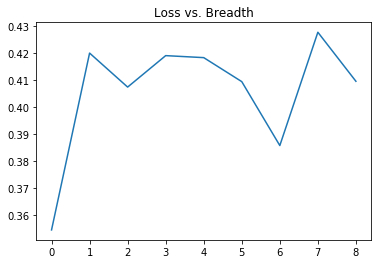

In [46]:
#for l in losses:
#    plt.plot(range(len(l)), l)
plt.plot(range(len(losses)), [ float(l[-1]) for l in losses ])
plt.title("Loss vs. Breadth")
plt.show()